Olá 

Meu nome é Ramon e te ajudarei neste projeto. Fico feliz em rever seu projeto hoje.

Ao ao longo do texto farei algumas observações sobre melhorias no código e também farei comentários sobre suas percepções sobre o assunto. Estarei aberta a feedbacks e discussões sobre o tema.

Você encontrará meus comentários abaixo - **por favor, não os mova, modifique ou exclua**.

Você pode encontrar meus comentários em caixas verdes, amarelas ou vermelhas como esta:

<div class="alert alert-block alert-success">
<b> Comentário do revisor: </b> <a class="tocSkip"></a>

Sucesso. Tudo foi feito corretamente.
</div>

<div class="alert alert-block alert-warning">
<b>Comentário do revisor: </b> <a class="tocSkip"></a>

Observações. Algumas recomendações.
</div>

<div class="alert alert-block alert-danger">

<b>Comentário do revisor: </b> <a class="tocSkip"></a>
    
Precisa de correções. O bloqueio requer algumas correções. O trabalho não pode ser aceito com os comentários em vermelho.
</div>

Você pode me responder usando isso:

<div class="alert alert-block alert-info">
<b>Resposta do Aluno.</b> <a class="tocSkip"></a>
</div>


# Practium Projecto Sprint  7 - Analise de negocios

# Descricao

Estamos diante de uma oferta de estágio no departamento analítico da Y.Afisha.  
Sua primeira tarefa é ajudar a empresa a otimizar suas despesas com marketing.

**Temos:**

- Logs do servidor com dados sobre os acessos a Y.Afisha de janeiro de 2017 até dezembro de 2018
- Arquivo de despejo com todos os pedidos feitos durante o período
- Estatísticas de despesas com marketing

**Iremos analisar:**

- Como as pessoas usam o produto
- Quando elas começam a comprar
- Quanto dinheiro cada cliente traz para a empresa
- Quando as despesas serão cobertas

## Preparacao dos dados 

### Importar as bibliotecas

In [1]:
import pandas as pd
import numpy as np
from IPython.core.display import display, HTML
from matplotlib import pyplot as plt
import seaborn as sns

<div class="alert alert-block alert-success">
<b> Comentário do revisor: </b> <a class="tocSkip"></a>

Correto
</div>

### Carregar os datasets

**A tabela visits (os logs do servidor com dados sobre os acessos ao site):**

- Uid — identificador unívoco do usuário
- Device — dispositivo do usuário
- Start Ts — data e hora do início da sessão
- End Ts — data e hora do final da sessão
- Source Id — identificador da origem do anúncio através do qual o usuário chegou

In [2]:
visits = pd.read_csv('https://practicum-content.s3.us-west-1.amazonaws.com/datasets/visits_log_us.csv')
print('Done!')

Done!


<div class="alert alert-block alert-success">
<b> Comentário do revisor: </b> <a class="tocSkip"></a>

Correto
</div>

**A tabela orders (dados sobre os pedidos):**

- Uid — identificador unívoco do usuário que faz um pedido
- Buy Ts — data e hora do pedido
- Revenue — a receita da Y.Afisha com o pedido

In [3]:
orders = pd.read_csv('https://practicum-content.s3.us-west-1.amazonaws.com/datasets/orders_log_us.csv')
print('Done!')

Done!


<div class="alert alert-block alert-success">
<b> Comentário do revisor: </b> <a class="tocSkip"></a>

Correto
</div>

**A tabela costs (dados sobre as despesas com marketing):**

- source_id — identificador da origem de anúncio
- dt — data
- costs — despesas com esta origem de anúncio neste dia

In [4]:
costs  = pd.read_csv('https://practicum-content.s3.us-west-1.amazonaws.com/datasets/costs_us.csv')
print('Done!')

Done!


<div class="alert alert-block alert-success">
<b> Comentário do revisor: </b> <a class="tocSkip"></a>

Correto
</div>

### Verificacao do consumo de memoria

In [5]:
display(visits.info(memory_usage='deep'))

display(orders.info(memory_usage='deep'))

display(costs.info(memory_usage='deep'))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 359400 entries, 0 to 359399
Data columns (total 5 columns):
 #   Column     Non-Null Count   Dtype 
---  ------     --------------   ----- 
 0   Device     359400 non-null  object
 1   End Ts     359400 non-null  object
 2   Source Id  359400 non-null  int64 
 3   Start Ts   359400 non-null  object
 4   Uid        359400 non-null  uint64
dtypes: int64(1), object(3), uint64(1)
memory usage: 79.3 MB


None

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50415 entries, 0 to 50414
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Buy Ts   50415 non-null  object 
 1   Revenue  50415 non-null  float64
 2   Uid      50415 non-null  uint64 
dtypes: float64(1), object(1), uint64(1)
memory usage: 4.4 MB


None

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2542 entries, 0 to 2541
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   source_id  2542 non-null   int64  
 1   dt         2542 non-null   object 
 2   costs      2542 non-null   float64
dtypes: float64(1), int64(1), object(1)
memory usage: 206.2 KB


None

<div class="alert alert-block alert-success">
<b> Comentário do revisor: </b> <a class="tocSkip"></a>

Correto
</div>

### Optimizacao

#### Visitas

Amostra dos dados

In [6]:
visits.head()

,Device,End Ts,Source Id,Start Ts,Uid
0,touch,2017-12-20 17:38:00,4,2017-12-20 17:20:00,16879256277535980062
1,desktop,2018-02-19 17:21:00,2,2018-02-19 16:53:00,104060357244891740
2,touch,2017-07-01 01:54:00,5,2017-07-01 01:54:00,7459035603376831527
3,desktop,2018-05-20 11:23:00,9,2018-05-20 10:59:00,16174680259334210214
4,desktop,2017-12-27 14:06:00,3,2017-12-27 14:06:00,9969694820036681168


<div class="alert alert-block alert-success">
<b> Comentário do revisor: </b> <a class="tocSkip"></a>

Correto
</div>

In [7]:
visits.Device.value_counts()

desktop    262567
touch       96833
Name: Device, dtype: int64

<div class="alert alert-block alert-success">
<b> Comentário do revisor: </b> <a class="tocSkip"></a>

Correto
</div>

In [8]:
visits['Source Id'].value_counts()

4     101794
3      85610
5      66905
2      47626
1      34121
9      13277
10     10025
7         36
6          6
Name: Source Id, dtype: int64

<div class="alert alert-block alert-success">
<b> Comentário do revisor: </b> <a class="tocSkip"></a>

Correto
</div>

Notamos que as colunas `Device` e `Source Id` tem poucos valores predefinidos entao sao boas para para categorizar

As colunas `End Ts` e `Start Ts` Serao tratadas como datetime para possibilitar as operacoes com data

<div class="alert alert-block alert-success">
<b> Comentário do revisor: </b> <a class="tocSkip"></a>

Correto
</div>

In [9]:
visits = pd.read_csv(
    'https://practicum-content.s3.us-west-1.amazonaws.com/datasets/visits_log_us.csv',
    dtype={'Device': 'category', 'Source Id':'category'},
    parse_dates=['Start Ts', 'End Ts']
)
print('Done!')

Done!


<div class="alert alert-block alert-success">
<b> Comentário do revisor: </b> <a class="tocSkip"></a>

Correto
</div>

#### Ordens

In [10]:
orders.head()

,Buy Ts,Revenue,Uid
0,2017-06-01 00:10:00,17.00,10329302124590727494
1,2017-06-01 00:25:00,0.55,11627257723692907447
2,2017-06-01 00:27:00,0.37,17903680561304213844
3,2017-06-01 00:29:00,0.55,16109239769442553005
4,2017-06-01 07:58:00,0.37,14200605875248379450


<div class="alert alert-block alert-success">
<b> Comentário do revisor: </b> <a class="tocSkip"></a>

Correto
</div>

Apenas trataremos a coluna `Buy Ts` como datetime 

In [11]:
orders = pd.read_csv(
    'https://practicum-content.s3.us-west-1.amazonaws.com/datasets/orders_log_us.csv',
                    parse_dates=['Buy Ts'])
print('Done!')

Done!


<div class="alert alert-block alert-success">
<b> Comentário do revisor: </b> <a class="tocSkip"></a>

Correto
</div>

#### Custos

In [12]:
costs.head()

,source_id,dt,costs
0,1,2017-06-01,75.20
1,1,2017-06-02,62.25
2,1,2017-06-03,36.53
3,1,2017-06-04,55.00
4,1,2017-06-05,57.08


<div class="alert alert-block alert-success">
<b> Comentário do revisor: </b> <a class="tocSkip"></a>

Correto
</div>

In [13]:
costs.source_id.value_counts()

5     364
2     363
4     363
10    363
1     363
3     363
9     363
Name: source_id, dtype: int64

A coluna `source_id` tem ja poucos valores predefinidos entao sera categorizado

A coluna `dt` sera tratado como datetime 

<div class="alert alert-block alert-success">
<b> Comentário do revisor: </b> <a class="tocSkip"></a>

Correto
</div>

In [14]:
costs = pd.read_csv(
    'https://practicum-content.s3.us-west-1.amazonaws.com/datasets/costs_us.csv',
                    dtype={'source_id': 'category'},
                    parse_dates=['dt']
                    )
print('Done!')

Done!


<div class="alert alert-block alert-success">
<b> Comentário do revisor: </b> <a class="tocSkip"></a>

Correto
</div>

In [15]:
print(f"visits - Uso de memoria : {visits.memory_usage(deep=True).sum() / (1024*1024):.2f} mbytes")
print(f"orders - Uso de memoria : {orders.memory_usage(deep=True).sum() / (1024*1024):.2f} mbytes")
print(f"costs - Uso de memoria : {costs.memory_usage(deep=True).sum() / (1024*1024):.2f} mbytes")

visits - Uso de memoria : 8.91 mbytes
orders - Uso de memoria : 1.15 mbytes
costs - Uso de memoria : 0.04 mbytes


<div class="alert alert-block alert-success">
<b> Comentário do revisor: </b> <a class="tocSkip"></a>

Correto
</div>

## Verificação dos Dados

Iremos criar a função abaixo para agilizar a verificação inicial de valores ausentes e duplicados de forma geral nos dataframes deste projecto.

A função tem a seguinte arquitectura  
input:
- df : pandas dataframe
- dfname : nome do dataframe (para apresentacao apenas)

output:
- Resultado da verificação de valores ausentes e duplicados

In [16]:
def checkdata(df : pd.DataFrame, dfname : str):
    
    display(HTML(f'<h4>Dataframe {dfname}</h4>'))
    if df.isna().any().sum() == 0:
        print(f"✅ {dfname} sem valores ausentes")
    else: 
        print(f"❗️ {dfname} tem {visits.isna().sum().sum() } valores ausentes, necessita de validações/tratamento")
        
    if df.duplicated().sum() == 0:
        print(f"✅ {dfname} sem dados duplicados")
    else: 
        print(f"❗️ {dfname} tem {visits.duplicated().sum() } dados duplicados, necessita de validações/tratamento")
        

#### Ausentes e Duplicados

In [17]:
checkdata(visits, "visits")
checkdata(costs, "orders")
checkdata(costs, "costs")

✅ visits sem valores ausentes
✅ visits sem dados duplicados


✅ orders sem valores ausentes
✅ orders sem dados duplicados


✅ costs sem valores ausentes
✅ costs sem dados duplicados


<div class="alert alert-block alert-success">
<b> Comentário do revisor: </b> <a class="tocSkip"></a>

Muito legal essa função
</div>

Sem tratamento ou validações necessarias para os dados.

## Relatorios

As nossas analises centram-se apenas em responder as questoes ja submetitidas.

### Produto

#### - Quantas pessoas usam-no cada dia, semana e mês?

Iremos extrair da coluna `Start Ts` o mês, semana e o dia de cada visita.

In [18]:
# Ano da visita
visits['ano'] = visits['Start Ts'].dt.year
# Mes da visita
visits['mes']  = visits['Start Ts'].dt.date.astype('datetime64[M]')
# Semana da visita
visits['semana'] = visits['Start Ts'].dt.isocalendar().week
# Dia da visita
visits['dia'] = visits['Start Ts'].dt.date


<div class="alert alert-block alert-success">
<b> Comentário do revisor: </b> <a class="tocSkip"></a>

Correto
</div>

Podemos validar como ficaram os dados.

In [19]:
visits.head()

,Device,End Ts,Source Id,Start Ts,Uid,ano,mes,semana,dia
0,touch,2017-12-20 17:38:00,4,2017-12-20 17:20:00,16879256277535980062,2017,2017-12-01,51,2017-12-20
1,desktop,2018-02-19 17:21:00,2,2018-02-19 16:53:00,104060357244891740,2018,2018-02-01,8,2018-02-19
2,touch,2017-07-01 01:54:00,5,2017-07-01 01:54:00,7459035603376831527,2017,2017-07-01,26,2017-07-01
3,desktop,2018-05-20 11:23:00,9,2018-05-20 10:59:00,16174680259334210214,2018,2018-05-01,20,2018-05-20
4,desktop,2017-12-27 14:06:00,3,2017-12-27 14:06:00,9969694820036681168,2017,2017-12-01,52,2017-12-27


<div class="alert alert-block alert-success">
<b> Comentário do revisor: </b> <a class="tocSkip"></a>

Correto
</div>

##### Quantas pessoas usam-no a cada Dia ?

Para responder a esta questão iremos agrupar os identificadores unicos dos utilizadores por dia e calcular a media geral que ira representar o nosso   
**DAU** >> Daily Acive Users 

Uma vez que faremos o mesmo processamento para as outras metricas, podemos criar a funcao abaixo para evitar alguma redundancia de codigo.

Inputs:
- df : Dataframe 
- colunas : lista
- descricao : texto
- plot : Boleano

Output:
- Ira calcular a metrica, apresentar do dataframe com uma visao temporal da quantidade de utilizadores unicos e apresentar um grafico se necessario

<div class="alert alert-block alert-success">
<b> Comentário do revisor: </b> <a class="tocSkip"></a>

Correto
</div>

In [20]:
def calculate_active_users( df: pd.DataFrame,  colunas : list, descricao : str, plot = False):

    df_temp = visits.groupby(colunas)['Uid'].nunique().reset_index(name='total_users').head()
    df_temp.columns = colunas + ['total_users']

    display(df_temp.head())

    metrica = df_temp.total_users.mean()
    print( descricao ,int(metrica))

    if plot:    
        # create a plot
        fig, ax = plt.subplots()
        df_temp.plot(x=colunas[0], y='total_users', figsize=(18,5), ax=ax)

        # add a horizontal line at y=0.5
        y_line = metrica
        ax.axhline(y=y_line, color='r', linestyle='--')

        # add text above the line
        ax.text( df_temp[colunas[0]][0] , metrica-20, f'{descricao}: {metrica}', color='red')

        # show the plot
        plt.show()

,dia,total_users
0,2017-06-01,605
1,2017-06-02,608
2,2017-06-03,445
3,2017-06-04,476
4,2017-06-05,820


DAU 590


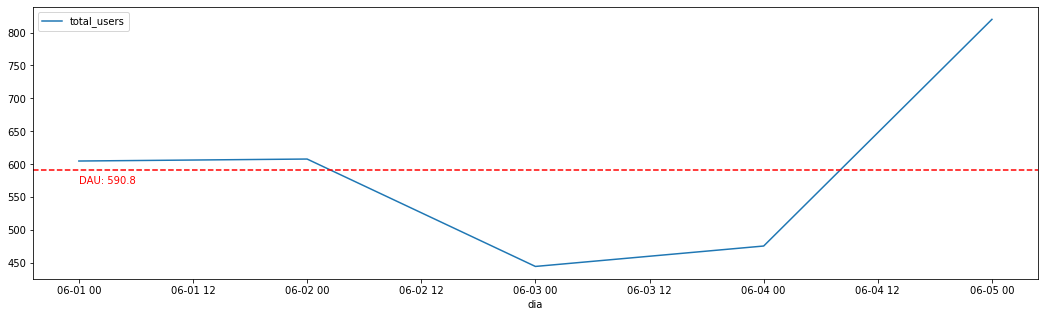

In [21]:
calculate_active_users(visits, ['dia'], 'DAU', True)

<div class="alert alert-block alert-success">
<b> Comentário do revisor: </b> <a class="tocSkip"></a>

Parabéns. Ficou ótimo
</div>

##### Mes

Tal como calculado para o dia, temos também o **MAU** >> Month Active Users

,mes,total_users
0,2017-06-01,13259
1,2017-07-01,14183
2,2017-08-01,11631
3,2017-09-01,18975
4,2017-10-01,29692


MAU 17548


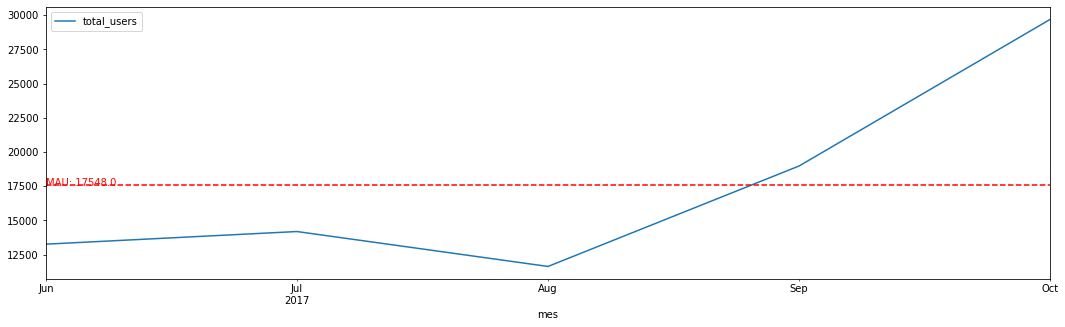

In [22]:
calculate_active_users(visits, ['mes'], 'MAU', True)

<div class="alert alert-block alert-success">
<b> Comentário do revisor: </b> <a class="tocSkip"></a>

Correto
</div>

##### Semana

O nosso **WAU** (Week Active Users) será calculado agrupando o numero da semana e o ano de modos a haver distinção dos anos

In [23]:
calculate_active_users(visits, ['ano','semana'], 'WAU')

,ano,semana,total_users
0,2017,22,2021
1,2017,23,4129
2,2017,24,2812
3,2017,25,2878
4,2017,26,3064


WAU 2980


<div class="alert alert-block alert-success">
<b> Comentário do revisor: </b> <a class="tocSkip"></a>

Correto
</div>

#### - Quantas sessões ocorrem por dia? (um usuário pode realizar várias sessões).

Para responder a esta questão podemos dividir o **número de sessões** pelo **número de usuários**

Teremos então:

In [24]:
# Agrupar por dia e contar o total de utilizadores e o total de utilizadores unicos
sessions_per_user = visits.groupby( ['dia']).agg( {'Uid': ['count', 'nunique']} )

# Renomear as colunas para facil interpretacao
sessions_per_user.columns = ['n_sessions', 'n_users']

# Divir o numero de sessoes pelo numero de utilizadores
sessions_per_user['sessions_per_user'] = ( sessions_per_user['n_sessions'] / sessions_per_user['n_users'] )

#A presentar uma amostra
display(sessions_per_user.head())

# Calcular a media
media = sessions_per_user.sessions_per_user.mean()

# Responder a questao
print(f"Em média, cada usuário tem no máximo {int(media)} sessão no aplicativo por dia. ",)

,n_sessions,n_users,sessions_per_user
dia,,,
2017-06-01,664,605,1.097521
2017-06-02,658,608,1.082237
2017-06-03,477,445,1.071910
2017-06-04,510,476,1.071429
2017-06-05,893,820,1.089024


Em média, cada usuário tem no máximo 1 sessão no aplicativo por dia. 


<div class="alert alert-block alert-success">
<b> Comentário do revisor: </b> <a class="tocSkip"></a>

Correto. Tome cuidado ao usar df.columns = [] o ideal é usar rename
</div>

Podemos olhar os graficos abaixo para notarmos se temos muitos valores atipicos para outras investigações

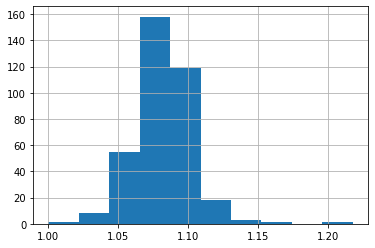

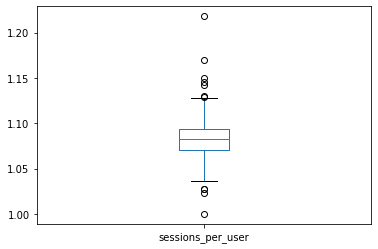

In [25]:
sessions_per_user.sessions_per_user.hist()
plt.show()
sessions_per_user.sessions_per_user.plot(kind = 'box')
plt.show()

<div class="alert alert-block alert-success">
<b> Comentário do revisor: </b> <a class="tocSkip"></a>

Correto
</div>

Podemos também validar o ritmo dos utilizadores nos dias pelo grafico abaixo

In [26]:
total_sessoes_dia = visits.groupby(['dia'])['Uid'].count().reset_index(name='total_sessions')
total_sessoes_dia

,dia,total_sessions
0,2017-06-01,664
1,2017-06-02,658
2,2017-06-03,477
3,2017-06-04,510
4,2017-06-05,893
...,...,...
359,2018-05-27,672
360,2018-05-28,1156
361,2018-05-29,1035
362,2018-05-30,1410


<div class="alert alert-block alert-success">
<b> Comentário do revisor: </b> <a class="tocSkip"></a>

Correto
</div>

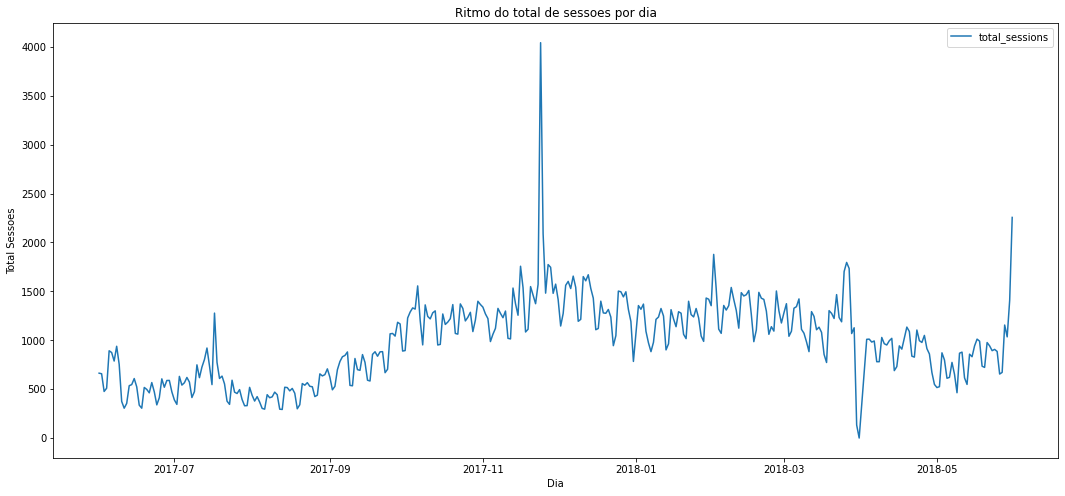

In [27]:
total_sessoes_dia.plot(kind='line', x='dia', y='total_sessions', figsize=(18,8))
plt.ylabel('Total Sessoes')
plt.xlabel('Dia')
plt.title('Ritmo do total de sessoes por dia')
plt.show()

Nota-se 2 principais picos acentuados nas datas abaixo  
É necessario apurarmos os eventos externos ao site nestas datas.

<div class="alert alert-block alert-success">
<b> Comentário do revisor: </b> <a class="tocSkip"></a>

Correto porém veja que o dia 2018-03-31	 naõ é um pico mas uma vale ou mínimo
</div>

In [28]:
display( total_sessoes_dia [ total_sessoes_dia.index.isin( total_sessoes_dia.total_sessions.nlargest(1).index) ] )
display( total_sessoes_dia [ total_sessoes_dia.index.isin( total_sessoes_dia.total_sessions.nsmallest(1).index) ] )


,dia,total_sessions
176,2017-11-24,4042


,dia,total_sessions
303,2018-03-31,1


<div class="alert alert-block alert-success">
<b> Comentário do revisor: </b> <a class="tocSkip"></a>

Correto
</div>

#### - Que comprimento tem cada sessão?

Para obtermos esta metrica basta calcularmos a diferença dos dois timestamps em unidade de segundos 

In [29]:
visits.dtypes

Device             category
End Ts       datetime64[ns]
Source Id          category
Start Ts     datetime64[ns]
Uid                  uint64
ano                   int64
mes          datetime64[ns]
semana               UInt32
dia                  object
dtype: object

<div class="alert alert-block alert-success">
<b> Comentário do revisor: </b> <a class="tocSkip"></a>

Correto
</div>

In [30]:
visits['session_duration_sec'] = (visits['End Ts'] - visits['Start Ts']).dt.seconds

visits.head()

,Device,End Ts,Source Id,Start Ts,Uid,ano,mes,semana,dia,session_duration_sec
0,touch,2017-12-20 17:38:00,4,2017-12-20 17:20:00,16879256277535980062,2017,2017-12-01,51,2017-12-20,1080
1,desktop,2018-02-19 17:21:00,2,2018-02-19 16:53:00,104060357244891740,2018,2018-02-01,8,2018-02-19,1680
2,touch,2017-07-01 01:54:00,5,2017-07-01 01:54:00,7459035603376831527,2017,2017-07-01,26,2017-07-01,0
3,desktop,2018-05-20 11:23:00,9,2018-05-20 10:59:00,16174680259334210214,2018,2018-05-01,20,2018-05-20,1440
4,desktop,2017-12-27 14:06:00,3,2017-12-27 14:06:00,9969694820036681168,2017,2017-12-01,52,2017-12-27,0


<div class="alert alert-block alert-success">
<b> Comentário do revisor: </b> <a class="tocSkip"></a>

Correto
</div>

Olharemos a distribuicao da duracao:

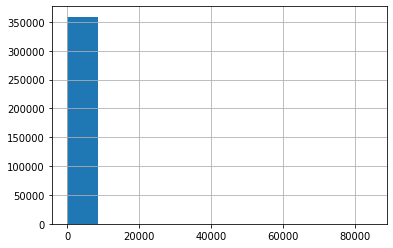

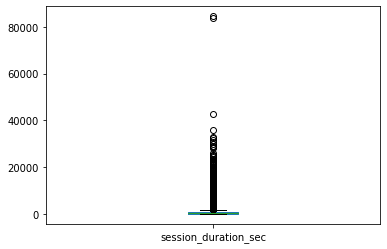

In [31]:
visits['session_duration_sec'].hist()
plt.show()
visits['session_duration_sec'].plot(kind = 'box')
plt.show()

Nota-se que há sim alguns valores atipicos que carecem mais analises então estamos diante de uma distribuição não normal deste modo com certeza teremos uma média muito influenciada pelos valires atipicos:

<div class="alert alert-block alert-success">
<b> Comentário do revisor: </b> <a class="tocSkip"></a>

Correto
</div>

In [32]:
print(visits['session_duration_sec'].mean())

643.506488592098


Então para darmos resposta podemos optar pela **moda**

In [33]:
print(visits['session_duration_sec'].mode())

0    60
dtype: int64


<div class="alert alert-block alert-success">
<b> Comentário do revisor: </b> <a class="tocSkip"></a>

Correto
</div>

#### - Com que frequência os usuários voltam?

Iremos realizar uma analise de coorte de tempo para responder a esta questao

Precisamos obter a `data da primeira visita de cada utilizador`:

In [34]:
primeira_visita = visits.groupby('Uid')['Start Ts'].min()

primeira_visita.head(2)

Uid
11863502262781   2018-03-01 17:27:00
49537067089222   2018-02-06 15:55:00
Name: Start Ts, dtype: datetime64[ns]

<div class="alert alert-block alert-success">
<b> Comentário do revisor: </b> <a class="tocSkip"></a>

Correto
</div>

Vamos renomear de modos a evitar o conflito com a actual coluna `Start Ts` no momento da junção dos dados

In [35]:
primeira_visita.name = 'primeira_visita'
primeira_visita.head()

Uid
11863502262781    2018-03-01 17:27:00
49537067089222    2018-02-06 15:55:00
297729379853735   2017-06-07 18:47:00
313578113262317   2017-09-18 22:49:00
325320750514679   2017-09-30 14:29:00
Name: primeira_visita, dtype: datetime64[ns]

<div class="alert alert-block alert-success">
<b> Comentário do revisor: </b> <a class="tocSkip"></a>

Correto
</div>

Juntamos os dados pela coluna comum nos dois dataframes

In [36]:
visits = visits.join(primeira_visita, on='Uid')

<div class="alert alert-block alert-success">
<b> Comentário do revisor: </b> <a class="tocSkip"></a>

Correto
</div>

Podemos olhar uma amostra em que as datas são diferentes

In [37]:
visits[ visits['Start Ts'] != visits.primeira_visita ].head()

,Device,End Ts,Source Id,Start Ts,Uid,ano,mes,semana,dia,session_duration_sec,primeira_visita
3,desktop,2018-05-20 11:23:00,9,2018-05-20 10:59:00,16174680259334210214,2018,2018-05-01,20,2018-05-20,1440,2018-03-09 20:05:00
6,desktop,2018-01-30 12:09:00,1,2018-01-30 11:13:00,6661610529277171451,2018,2018-01-01,5,2018-01-30,3360,2017-06-29 09:00:00
11,desktop,2018-01-25 19:41:00,1,2018-01-25 19:37:00,7478054213403174082,2018,2018-01-01,4,2018-01-25,240,2018-01-25 14:16:00
12,desktop,2018-02-06 15:50:00,4,2018-02-06 15:45:00,8056418121947262981,2018,2018-02-01,6,2018-02-06,300,2017-06-04 14:17:00
14,touch,2018-04-23 18:01:00,9,2018-04-23 18:00:00,18026419100367255411,2018,2018-04-01,17,2018-04-23,60,2017-10-04 22:44:00


<div class="alert alert-block alert-success">
<b> Comentário do revisor: </b> <a class="tocSkip"></a>

Correto
</div>

In [38]:
visits.dtypes

Device                        category
End Ts                  datetime64[ns]
Source Id                     category
Start Ts                datetime64[ns]
Uid                             uint64
ano                              int64
mes                     datetime64[ns]
semana                          UInt32
dia                             object
session_duration_sec             int64
primeira_visita         datetime64[ns]
dtype: object

<div class="alert alert-block alert-success">
<b> Comentário do revisor: </b> <a class="tocSkip"></a>

Correto
</div>

De seguida extraimos o mes da primeira visita para a criação das coortes mensais.

In [39]:
visits['mes_primeira_visita'] = visits.primeira_visita.dt.date.astype('datetime64[M]')
visits.head()


,Device,End Ts,Source Id,Start Ts,Uid,ano,mes,semana,dia,session_duration_sec,primeira_visita,mes_primeira_visita
0,touch,2017-12-20 17:38:00,4,2017-12-20 17:20:00,16879256277535980062,2017,2017-12-01,51,2017-12-20,1080,2017-12-20 17:20:00,2017-12-01
1,desktop,2018-02-19 17:21:00,2,2018-02-19 16:53:00,104060357244891740,2018,2018-02-01,8,2018-02-19,1680,2018-02-19 16:53:00,2018-02-01
2,touch,2017-07-01 01:54:00,5,2017-07-01 01:54:00,7459035603376831527,2017,2017-07-01,26,2017-07-01,0,2017-07-01 01:54:00,2017-07-01
3,desktop,2018-05-20 11:23:00,9,2018-05-20 10:59:00,16174680259334210214,2018,2018-05-01,20,2018-05-20,1440,2018-03-09 20:05:00,2018-03-01
4,desktop,2017-12-27 14:06:00,3,2017-12-27 14:06:00,9969694820036681168,2017,2017-12-01,52,2017-12-27,0,2017-12-27 14:06:00,2017-12-01


<div class="alert alert-block alert-success">
<b> Comentário do revisor: </b> <a class="tocSkip"></a>

Correto
</div>

A idade/tempo das coortes será a **diferença entre o mes da visita do user e o mes da primeira visita do mesmo user.** 

In [40]:
visits['idade'] = ((visits['mes'] - visits['mes_primeira_visita']) / np.timedelta64(1,'M')).round().astype('int')


<div class="alert alert-block alert-success">
<b> Comentário do revisor: </b> <a class="tocSkip"></a>

Correto
</div>

Vamos agrupar os dados por `coorte (mes da primeira visita)`  e `tempo de vida (idade)` e descobrir a quantidade de `usuários ativos (nunique Uid)` em determinado mes de tempo de vida para cada coorte:

In [41]:
cohort_mes = visits.pivot_table(
    index='mes_primeira_visita',
    columns='idade',
    values='Uid',
    aggfunc='nunique',
    fill_value = 0
)

#cohort_mes.index = cohort_mes.index.year.astype(str) + " " + cohort_mes.index.strftime('%B')

cohort_mes.replace(0,'')

idade,0,1,2,3,4,5,6,7,8,9,10,11
mes_primeira_visita,,,,,,,,,,,,
2017-06-01,13259,1043,713,814,909,947,809,766,694,674,539,596
2017-07-01,13140,737,674,738,765,633,596,601,510,376,361,
2017-08-01,10181,783,640,639,510,448,370,402,284,265,,
2017-09-01,16704,1428,1156,847,658,632,599,404,381,,,
2017-10-01,25977,2042,1357,1012,890,837,555,529,,,,
2017-11-01,27248,2133,1202,1054,919,638,594,,,,,
2017-12-01,25268,1410,960,786,512,481,,,,,,
2018-01-01,22624,1351,890,565,458,,,,,,,
2018-02-01,22197,1267,565,446,,,,,,,,


<div class="alert alert-block alert-success">
<b> Comentário do revisor: </b> <a class="tocSkip"></a>

Correto
</div>

Para melhor visualização iremos criar o heatmap para destaque das diferenças nos valores. 

Uma vez que iremos imprimir varios heatmaps podemos cirar uma funcao para simplificar as apresentacaoes

A funcao recebe:

- df > Pandas DataFrame
- titulo > String para o titulo do grafico
- cumsum > Boleano para definir se iremos apresentar a soma acumulada
- casasDecimais > inteiro : o numero de casas decimais para os valores float.

A funcao retorna:
- A apresentacao do dataframe

In [42]:
def plotheatmap(df : pd.DataFrame, titulo : str, cumsum : bool = False, casasDecimais : int = 0, percentagem :bool = False):
    plt.figure(figsize=(15, 10))
    plt.title(titulo, fontsize='18', fontweight='bold', color='cornflowerblue')

    if cumsum:
        df = df.cumsum(axis=1)
        
    sns.heatmap(
        df,
        annot=True,
#         fmt=f'.{casasDecimais}f' + f'{"%" if percentagem else ""} ',
        fmt=f'.{casasDecimais}f',
        linewidths=1.5,
        linecolor='white',
        cmap ='Blues' # Blues coolwarm mako
    )

    plt.show()

<div class="alert alert-block alert-success">
<b> Comentário do revisor: </b> <a class="tocSkip"></a>

Correto
</div>

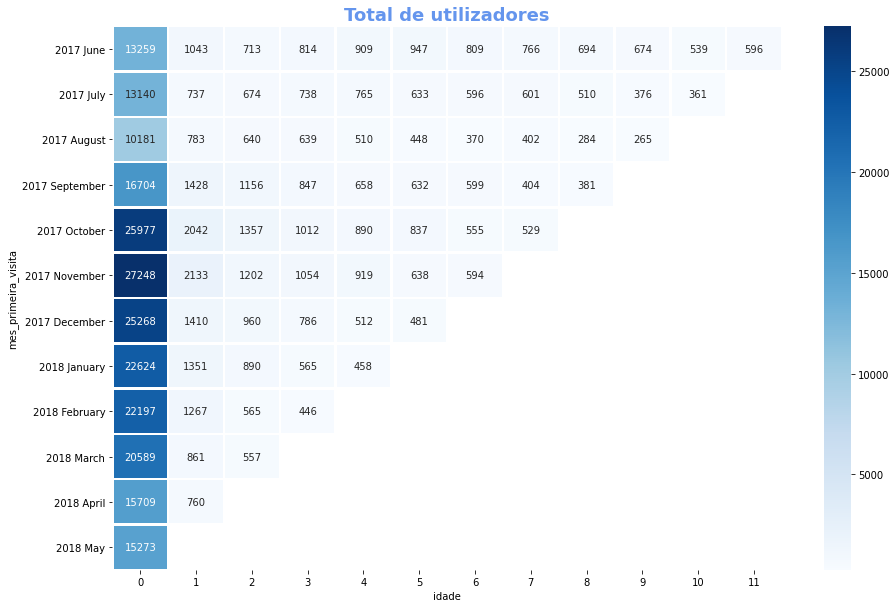

In [43]:
df_temp = cohort_mes.copy()

df_temp = df_temp.replace(0,np.nan)
df_temp.index = df_temp.index.year.astype(str) + " " + df_temp.index.strftime('%B')
plotheatmap(df_temp, 'Total de utilizadores', False, 0)

<div class="alert alert-block alert-success">
<b> Comentário do revisor: </b> <a class="tocSkip"></a>

Correto
</div>

### Taxa de retencao

Para calcular a taxa de retenção, primeiro precisamos `recuperar a quantidade inicial de usuários` em uma coorte e dividí-la pela `quantidade de usuários para cada semana seguinte.`

A biblioteca pandas nos facilita esta operacao pelo metodo `divide` e passamos os argumentos `a primeira coluna` e o eixo `0 (rows)`

In [44]:
retention_pivot =  df_temp.divide(df_temp.iloc[:, 0], axis='rows')
retention_pivot.fillna('')

idade,0,1,2,3,4,5,6,7,8,9,10,11
mes_primeira_visita,,,,,,,,,,,,
2017 June,1.0,0.078664,0.053775,0.061392,0.068557,0.071423,0.061015,0.057772,0.052342,0.050833,0.040652,0.044951
2017 July,1.0,0.056088,0.051294,0.056164,0.058219,0.048174,0.045358,0.045738,0.038813,0.028615,0.027473,
2017 August,1.0,0.076908,0.062862,0.062764,0.050093,0.044004,0.036342,0.039485,0.027895,0.026029,,
2017 September,1.0,0.085489,0.069205,0.050706,0.039392,0.037835,0.03586,0.024186,0.022809,,,
2017 October,1.0,0.078608,0.052239,0.038958,0.034261,0.032221,0.021365,0.020364,,,,
2017 November,1.0,0.078281,0.044113,0.038682,0.033727,0.023415,0.0218,,,,,
2017 December,1.0,0.055802,0.037993,0.031107,0.020263,0.019036,,,,,,
2018 January,1.0,0.059715,0.039339,0.024973,0.020244,,,,,,,
2018 February,1.0,0.05708,0.025454,0.020093,,,,,,,,


<div class="alert alert-block alert-success">
<b> Comentário do revisor: </b> <a class="tocSkip"></a>

Correto
</div>

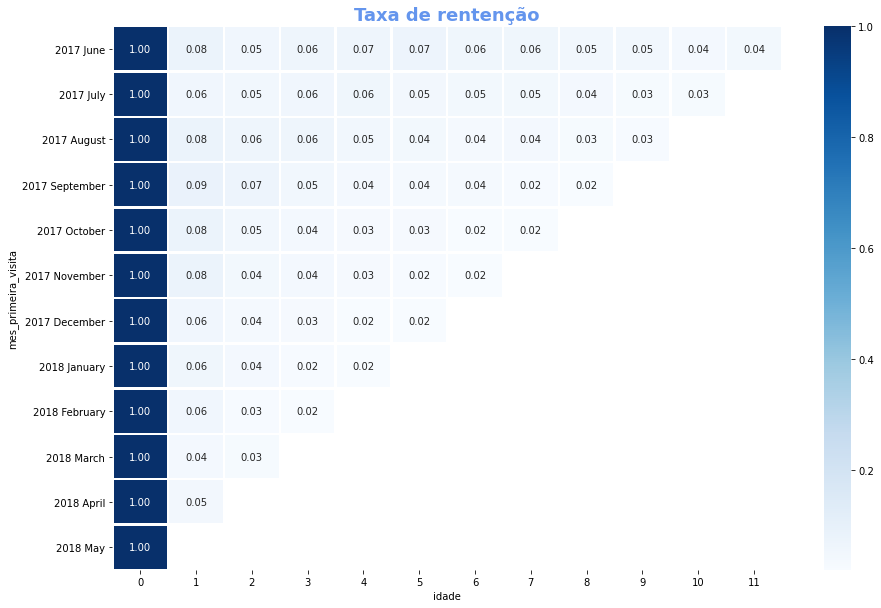

In [45]:
df_temp = retention_pivot.copy()
plotheatmap(df_temp, 'Taxa de rentenção', False, 2, False)

<div class="alert alert-block alert-success">
<b> Comentário do revisor: </b> <a class="tocSkip"></a>

Correto
</div>

In [46]:
retention_pivot.mean(axis='columns')

mes_primeira_visita
2017 June         0.136781
2017 July         0.132358
2017 August       0.142638
2017 September    0.151720
2017 October      0.159752
2017 November     0.177145
2017 December     0.194033
2018 January      0.228854
2018 February     0.275657
2018 March        0.356291
2018 April        0.524190
2018 May          1.000000
dtype: float64

- De forma geral os utilizadores se mantem interessados ate o fim do segundo mes

<div class="alert alert-block alert-success">
<b> Comentário do revisor: </b> <a class="tocSkip"></a>

Correto
</div>

### Vendas


#### Quando as pessoas começam a comprar? 



A questão nos leva ao calculo de conversão dos utilizadores, de forma resumida saberemos quanto tempo se passou desde a primeira visita até o momento da primeira compra.


E necessario juntar num mesmo dataframe a `data da primeira visita` e a `data da primeira compra de cada user`

In [47]:
orders['dia'] = orders['Buy Ts'].dt.date

<div class="alert alert-block alert-success">
<b> Comentário do revisor: </b> <a class="tocSkip"></a>

Correto
</div>

In [48]:
primeira_compra = orders.groupby('Uid')['dia'].min().reset_index()

#Novamente renomeamos a coluna `dia` para facil distinção com a coluna `dia` actual
primeira_compra = primeira_compra.rename(columns={'dia':'dia_primeira_compra'})

primeira_compra.head()

,Uid,dia_primeira_compra
0,313578113262317,2018-01-03
1,1575281904278712,2017-06-03
2,2429014661409475,2017-10-11
3,2464366381792757,2018-01-28
4,2551852515556206,2017-11-24


<div class="alert alert-block alert-success">
<b> Comentário do revisor: </b> <a class="tocSkip"></a>

Correto
</div>

Juntamos os dataframes pela coluna de uniao `Uid`

In [49]:
orders = orders.merge(primeira_compra, on='Uid', how='inner')

<div class="alert alert-block alert-success">
<b> Comentário do revisor: </b> <a class="tocSkip"></a>

Correto
</div>

Validação dos dados

In [50]:
orders[ orders.dia != orders.dia_primeira_compra ].head(5)

,Buy Ts,Revenue,Uid,dia,dia_primeira_compra
7,2017-06-05 14:30:00,7.33,12464626743129688638,2017-06-05,2017-06-01
9,2017-06-02 12:44:00,0.85,3644482766749211722,2017-06-02,2017-06-01
10,2017-06-02 15:08:00,12.83,3644482766749211722,2017-06-02,2017-06-01
11,2017-06-04 13:06:00,17.11,3644482766749211722,2017-06-04,2017-06-01
12,2017-06-07 11:06:00,7.33,3644482766749211722,2017-06-07,2017-06-01


<div class="alert alert-block alert-success">
<b> Comentário do revisor: </b> <a class="tocSkip"></a>

Correto
</div>

Neste ponto temos:
- A data da primeira ordem de cada user no dataframe `orders`
- A data da primeira visita de cada user no dataframe `visits`

Iremos então criar um dataframe que será resultado da junção dos dois dataframes pelo identificador do utilizador `Uid`

In [51]:
df_visit = visits[['Uid','primeira_visita']].copy()

# Por algum motivo não estava do tipo datetime, o codigo abaixo é apenas para garantir
df_visit['primeira_visita'] = df_visit['primeira_visita'].dt.date

# Juncao dos dataframes
df_orders = df_visit.merge(orders, on='Uid', how='inner')

<div class="alert alert-block alert-success">
<b> Comentário do revisor: </b> <a class="tocSkip"></a>

Correto
</div>

In [52]:

df_orders['conversao']=((df_orders['dia_primeira_compra'] - df_orders['primeira_visita']) / np.timedelta64(1,'D')).astype('int')

df_orders[ df_orders.conversao != 0 ].head()

,Uid,primeira_visita,Buy Ts,Revenue,dia,dia_primeira_compra,conversao
2,16007536194108375387,2017-09-03,2017-09-04 12:46:00,2.44,2017-09-04,2017-09-04,1
3,16007536194108375387,2017-09-03,2017-10-28 00:01:00,1.53,2017-10-28,2017-09-04,1
4,16007536194108375387,2017-09-03,2017-10-28 19:16:00,1.53,2017-10-28,2017-09-04,1
5,16007536194108375387,2017-09-03,2017-09-04 12:46:00,2.44,2017-09-04,2017-09-04,1
6,16007536194108375387,2017-09-03,2017-10-28 00:01:00,1.53,2017-10-28,2017-09-04,1


<div class="alert alert-block alert-success">
<b> Comentário do revisor: </b> <a class="tocSkip"></a>

Correto
</div>

In [53]:
print(f"A duracao media de conversao e de: {df_orders['conversao'].mean() :.2f} dias")

A duracao media de conversao e de: 17.63 dias


<div class="alert alert-block alert-success">
<b> Comentário do revisor: </b> <a class="tocSkip"></a>

Correto
</div>

Olharemos a distribuicao destes dados

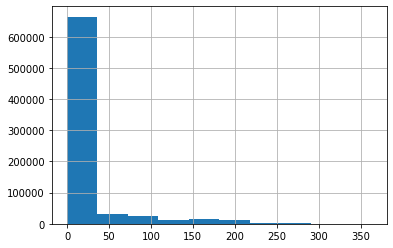

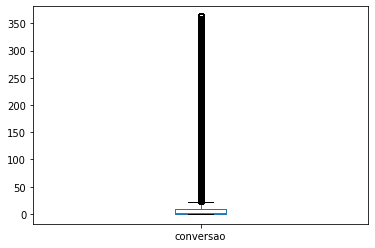

In [54]:
df_orders.conversao.hist()
plt.show()

df_orders.conversao.plot(kind='box')
plt.show()

Notamos que temos uma distribuicao nao normal com muitos valores atipicos

Podemos delimitar o dataframe pelos `whiskers` para entendermos a conversao considerada normal

<div class="alert alert-block alert-success">
<b> Comentário do revisor: </b> <a class="tocSkip"></a>

Correto
</div>

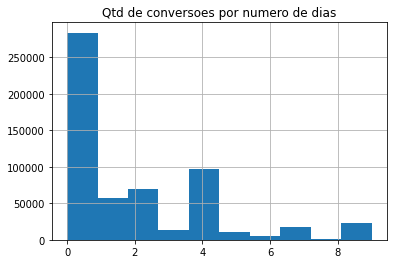

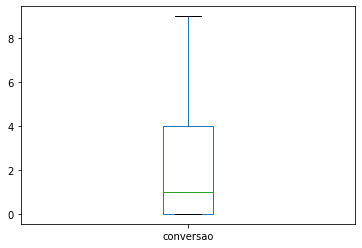

In [55]:
q1 = df_orders['conversao'].quantile(0.25)
q3 = df_orders['conversao'].quantile(0.75)

df_orders[ (q1 <= df_orders.conversao) & (q3 >= df_orders.conversao) ].conversao.hist()
plt.title('Qtd de conversoes por numero de dias')
plt.show()

df_orders[ (q1 <= df_orders.conversao) & (q3 >= df_orders.conversao) ].conversao.plot(kind='box')
plt.show()


<div class="alert alert-block alert-success">
<b> Comentário do revisor: </b> <a class="tocSkip"></a>

Correto
</div>

Com esta limitacao podemos calcular a media:

In [56]:
media_outlier = df_orders[ (q1 <= df_orders.conversao) & (q3 >= df_orders.conversao) ].conversao.mean()

print(f"A duracao media de conversao e de: {media_outlier:.2f} dias")

A duracao media de conversao e de: 1.81 dias


<div class="alert alert-block alert-success">
<b> Comentário do revisor: </b> <a class="tocSkip"></a>

Correto
</div>

Ou entao termos como base a mediana para todo o dataset:

In [57]:
df_orders.conversao.median()

2.0

<div class="alert alert-block alert-success">
<b> Comentário do revisor: </b> <a class="tocSkip"></a>

Correto
</div>

Por fim temos a taxa de conversao:

In [58]:
print(f' {orders.Uid.nunique()} de {visits.Uid.nunique()} foram convertidos para clientes ao fim de \
{ (orders["Buy Ts"].max() - visits["Start Ts"].min()).days } dias \n')

print(f' A taxa de conversao geral e de: {visits.Uid.nunique() / orders.Uid.nunique():.2f} %')

 36523 de 228169 foram convertidos para clientes ao fim de 365 dias 

 A taxa de conversao geral e de: 6.25 %


<div class="alert alert-block alert-success">
<b> Comentário do revisor: </b> <a class="tocSkip"></a>

Correto
</div>

#### Quantos pedidos os clientes fazem durante um determinado período de tempo?

Para responder a esta questao iremos tambel criar cohorts mensais para as compras.

<div class="alert alert-block alert-success">
<b> Comentário do revisor: </b> <a class="tocSkip"></a>

Correto
</div>

Verificamos o estado da dataframe:

In [59]:
orders.head()

,Buy Ts,Revenue,Uid,dia,dia_primeira_compra
0,2017-06-01 00:10:00,17.00,10329302124590727494,2017-06-01,2017-06-01
1,2017-06-01 00:25:00,0.55,11627257723692907447,2017-06-01,2017-06-01
2,2017-06-01 00:27:00,0.37,17903680561304213844,2017-06-01,2017-06-01
3,2017-06-01 00:29:00,0.55,16109239769442553005,2017-06-01,2017-06-01
4,2017-06-01 07:58:00,0.37,14200605875248379450,2017-06-01,2017-06-01


<div class="alert alert-block alert-success">
<b> Comentário do revisor: </b> <a class="tocSkip"></a>

Correto
</div>

- Iremos obter o mes da compra e da primera compra

In [60]:
orders['mes_primeira_compra']  = orders['dia_primeira_compra'].astype('datetime64[M]')
orders['mes_compra']  = orders['Buy Ts'].dt.date.astype('datetime64[M]')
orders.head()

,Buy Ts,Revenue,Uid,dia,dia_primeira_compra,mes_primeira_compra,mes_compra
0,2017-06-01 00:10:00,17.00,10329302124590727494,2017-06-01,2017-06-01,2017-06-01,2017-06-01
1,2017-06-01 00:25:00,0.55,11627257723692907447,2017-06-01,2017-06-01,2017-06-01,2017-06-01
2,2017-06-01 00:27:00,0.37,17903680561304213844,2017-06-01,2017-06-01,2017-06-01,2017-06-01
3,2017-06-01 00:29:00,0.55,16109239769442553005,2017-06-01,2017-06-01,2017-06-01,2017-06-01
4,2017-06-01 07:58:00,0.37,14200605875248379450,2017-06-01,2017-06-01,2017-06-01,2017-06-01


<div class="alert alert-block alert-success">
<b> Comentário do revisor: </b> <a class="tocSkip"></a>

Correto
</div>

- Vamos definir a tabela auxiliar que ira conter o total de clientes unicos das cohorts mensais.

In [61]:
cohort_sizes = orders.groupby('mes_primeira_compra').agg({'Uid': 'nunique'}).reset_index()
cohort_sizes.columns=['mes_primeira_compra','cohort_size']
cohort_sizes['mes_primeira_compra'] = cohort_sizes['mes_primeira_compra'].astype('datetime64[M]')

cohort_sizes.head()

,mes_primeira_compra,cohort_size
0,2017-06-01,2023
1,2017-07-01,1923
2,2017-08-01,1370
3,2017-09-01,2581
4,2017-10-01,4340


<div class="alert alert-block alert-success">
<b> Comentário do revisor: </b> <a class="tocSkip"></a>

Correto
</div>

In [62]:
#Calcular o numero de compras por cada cohort e mes 
cohort = orders.groupby(['mes_primeira_compra','mes_compra'])['Uid'].count().reset_index()

# Renomear as colunas
cohort.columns = ['mes_primeira_compra','mes_compra','compras']

# Juntar os dataframes 
cohort = cohort.merge (cohort_sizes,on='mes_primeira_compra')

# Idade do cohort
cohort['idade_mes'] = ((cohort['mes_compra'] - cohort['mes_primeira_compra']) / np.timedelta64(1,'M')).round()

# Compras por cliente
cohort['compras_por_cliente'] = cohort['compras']/cohort['cohort_size']
cohort.head()

,mes_primeira_compra,mes_compra,compras,cohort_size,idade_mes,compras_por_cliente
0,2017-06-01,2017-06-01,2354,2023,0.0,1.163618
1,2017-06-01,2017-07-01,177,2023,1.0,0.087494
2,2017-06-01,2017-08-01,174,2023,2.0,0.086011
3,2017-06-01,2017-09-01,226,2023,3.0,0.111715
4,2017-06-01,2017-10-01,292,2023,4.0,0.144340


<div class="alert alert-block alert-success">
<b> Comentário do revisor: </b> <a class="tocSkip"></a>

Correto
</div>

Vamos usar a soma acumulada para ver qual cohorte conter mais valor acumulado em compras por user.

idade_mes,0.0,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,10.0,11.0
mes_primeira_compra,,,,,,,,,,,,
2017 June,1.16,0.09,0.09,0.11,0.14,0.11,0.14,0.09,0.1,0.08,0.05,0.04
2017 July,1.14,0.05,0.06,0.05,0.04,0.04,0.03,0.03,0.03,0.01,0.03,
2017 August,1.12,0.08,0.07,0.06,0.06,0.05,0.04,0.06,0.03,0.03,,
2017 September,1.14,0.08,0.06,0.06,0.03,0.04,0.04,0.02,0.02,,,
2017 October,1.14,0.07,0.04,0.03,0.03,0.02,0.02,0.03,,,,
2017 November,1.18,0.1,0.04,0.05,0.03,0.01,0.02,,,,,
2017 December,1.15,0.06,0.05,0.04,0.02,0.02,,,,,,
2018 January,1.12,0.07,0.05,0.02,0.02,,,,,,,
2018 February,1.12,0.06,0.02,0.02,,,,,,,,


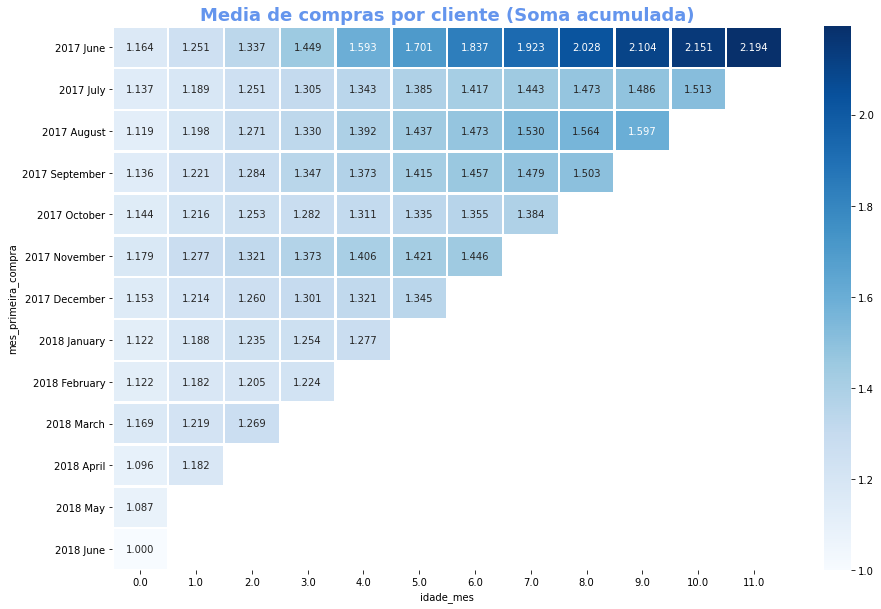

In [63]:
cohort_piv = cohort.pivot_table(
    index='mes_primeira_compra', 
    columns='idade_mes', 
    values='compras_por_cliente', 
    aggfunc='sum'
)

df_temp = cohort_piv.copy()

df_temp.index = df_temp.index.year.astype(str) + " " + df_temp.index.strftime('%B')

display(df_temp.round(2).fillna(''))

plotheatmap(df_temp, 'Media de compras por cliente (Soma acumulada)', True, 3)

<div class="alert alert-block alert-success">
<b> Comentário do revisor: </b> <a class="tocSkip"></a>

Correto
</div>

In [64]:
df_temp.mean(axis='columns')

mes_primeira_compra
2017 June         0.182814
2017 July         0.137569
2017 August       0.159708
2017 September    0.166946
2017 October      0.172955
2017 November     0.206532
2017 December     0.224124
2018 January      0.255440
2018 February     0.306081
2018 March        0.423059
2018 April        0.590949
2018 May          1.087349
2018 June         1.000000
dtype: float64

<div class="alert alert-block alert-success">
<b> Comentário do revisor: </b> <a class="tocSkip"></a>

Correto
</div>

#### Qual é o volume médio de uma compra?

Entendemos como volume media das compras o montante gasto por cada cliente, esta metrica pode ser calculada com base no valor anual,mensal,semanal ou ainda diario a depender do fluxo da empresa.

No ambito deste projecto iremos calcular o valor das compras por cada cohort

In [65]:
# Rever o estado do dataframe
orders.head()

,Buy Ts,Revenue,Uid,dia,dia_primeira_compra,mes_primeira_compra,mes_compra
0,2017-06-01 00:10:00,17.00,10329302124590727494,2017-06-01,2017-06-01,2017-06-01,2017-06-01
1,2017-06-01 00:25:00,0.55,11627257723692907447,2017-06-01,2017-06-01,2017-06-01,2017-06-01
2,2017-06-01 00:27:00,0.37,17903680561304213844,2017-06-01,2017-06-01,2017-06-01,2017-06-01
3,2017-06-01 00:29:00,0.55,16109239769442553005,2017-06-01,2017-06-01,2017-06-01,2017-06-01
4,2017-06-01 07:58:00,0.37,14200605875248379450,2017-06-01,2017-06-01,2017-06-01,2017-06-01


<div class="alert alert-block alert-success">
<b> Comentário do revisor: </b> <a class="tocSkip"></a>

Correto
</div>

In [66]:
# Criar as cohorts e achar o valor medio para as compras 
cohort_media = orders.groupby(['mes_primeira_compra','mes_compra'])['Revenue'].mean().reset_index()

# Idade do cohort
cohort_media['mes_idade'] = ((cohort_media['mes_compra'] - cohort_media['mes_primeira_compra']) / np.timedelta64(1,'M')).round()

cohort_media.head()

,mes_primeira_compra,mes_compra,Revenue,mes_idade
0,2017-06-01,2017-06-01,4.060106,0.0
1,2017-06-01,2017-07-01,5.547006,1.0
2,2017-06-01,2017-08-01,5.088161,2.0
3,2017-06-01,2017-09-01,8.545575,3.0
4,2017-06-01,2017-10-01,7.084178,4.0


<div class="alert alert-block alert-success">
<b> Comentário do revisor: </b> <a class="tocSkip"></a>

Correto
</div>

Criar a tabela pivot para facilitar a leitura.

mes_idade,0.0,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,10.0,11.0
mes_primeira_compra,,,,,,,,,,,,
2017 June,4.06,5.55,5.09,8.55,7.08,6.83,6.97,6.76,5.28,8.01,12.04,6.04
2017 July,5.29,6.45,9.99,6.64,4.72,3.66,3.79,5.45,5.35,11.79,5.65,
2017 August,4.72,5.99,6.28,6.62,7.96,6.27,5.89,7.11,8.7,5.6,,
2017 September,4.97,13.17,8.35,62.57,15.43,15.32,16.77,11.21,7.79,,,
2017 October,4.37,7.41,5.13,5.59,5.1,5.07,4.28,4.01,,,,
2017 November,4.37,4.1,4.47,6.28,4.44,3.73,4.6,,,,,
2017 December,4.11,4.23,20.07,26.08,15.95,14.11,,,,,,
2018 January,3.69,4.44,6.45,7.52,2.71,,,,,,,
2018 February,3.71,4.58,3.45,3.87,,,,,,,,


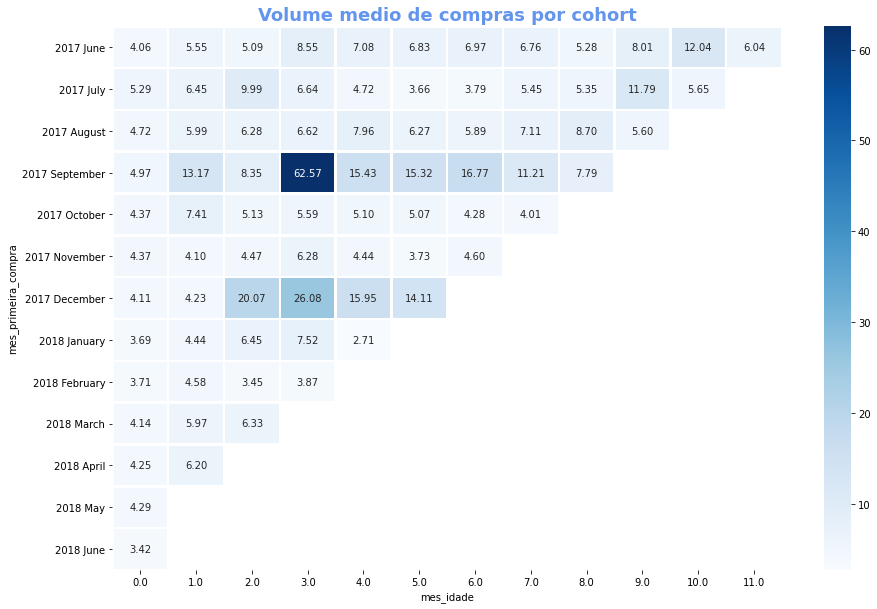

In [67]:
cohort_piv= cohort_media.pivot_table(
    index='mes_primeira_compra', 
    columns='mes_idade', 
    values='Revenue', 
    aggfunc='mean'
)

df_temp = cohort_piv.copy()

df_temp.index = df_temp.index.year.astype(str) + " " + df_temp.index.strftime('%B')

display(df_temp.round(2).fillna(''))

plotheatmap(df_temp, "Volume medio de compras por cohort", False, 2)

<div class="alert alert-block alert-success">
<b> Comentário do revisor: </b> <a class="tocSkip"></a>

Correto
</div>

In [68]:
cohort_piv.mean(axis='columns')

mes_primeira_compra
2017-06-01     6.853978
2017-07-01     6.252011
2017-08-01     6.513505
2017-09-01    17.285688
2017-10-01     5.119685
2017-11-01     4.571543
2017-12-01    14.092359
2018-01-01     4.963399
2018-02-01     3.900908
2018-03-01     5.482008
2018-04-01     5.226746
2018-05-01     4.286168
2018-06-01     3.420000
dtype: float64

<div class="alert alert-block alert-success">
<b> Comentário do revisor: </b> <a class="tocSkip"></a>

Correto
</div>

#### Quanto dinheiro eles trazem para a empresa (LTV)?

LTV (Lifetime Value)  
E o valor do ciclo de vida de um cliente, o valor total que o cliente pagou a empresa pelas compras feitas.  
Para calcular podemos ter em conta o lucro bruto do cliente por periodo. 



- Descubra a data da primeira compra de cada cliente
- Calcule a quantidade de novos clientes por cada data (ou intervalo de datas — neste caso, para cada mês)
- Inclua o mês do primeiro pedido na tabela de pedidos
- Agrupe a tabela e calcule a receita

Iremos novamente definir coortes mensais para darmos resposta

In [69]:
orders.head()

,Buy Ts,Revenue,Uid,dia,dia_primeira_compra,mes_primeira_compra,mes_compra
0,2017-06-01 00:10:00,17.00,10329302124590727494,2017-06-01,2017-06-01,2017-06-01,2017-06-01
1,2017-06-01 00:25:00,0.55,11627257723692907447,2017-06-01,2017-06-01,2017-06-01,2017-06-01
2,2017-06-01 00:27:00,0.37,17903680561304213844,2017-06-01,2017-06-01,2017-06-01,2017-06-01
3,2017-06-01 00:29:00,0.55,16109239769442553005,2017-06-01,2017-06-01,2017-06-01,2017-06-01
4,2017-06-01 07:58:00,0.37,14200605875248379450,2017-06-01,2017-06-01,2017-06-01,2017-06-01


<div class="alert alert-block alert-success">
<b> Comentário do revisor: </b> <a class="tocSkip"></a>

Correto
</div>

In [70]:
#Obter a receita para cada cohort 
ltv_cohort = orders.groupby(['mes_primeira_compra','mes_compra'])['Revenue'].sum().reset_index()
ltv_cohort.columns = ['mes_primeira_compra','mes_compra','revenue']

# Juntar com a tabela que tem o tamanho das cohorts
ltv_cohort = ltv_cohort.merge( cohort_sizes, on=['mes_primeira_compra'] )

# Determinar a idade em meses
ltv_cohort['idade'] = ( (ltv_cohort['mes_compra'] - ltv_cohort['mes_primeira_compra']) / np.timedelta64(1,'M')).round()

# Dividir a receita pela quantidade de clientes unicos
ltv_cohort['ltv'] = ltv_cohort['revenue'] / ltv_cohort['cohort_size']

ltv_cohort.head()

,mes_primeira_compra,mes_compra,revenue,cohort_size,idade,ltv
0,2017-06-01,2017-06-01,9557.49,2023,0.0,4.724414
1,2017-06-01,2017-07-01,981.82,2023,1.0,0.485329
2,2017-06-01,2017-08-01,885.34,2023,2.0,0.437637
3,2017-06-01,2017-09-01,1931.30,2023,3.0,0.954671
4,2017-06-01,2017-10-01,2068.58,2023,4.0,1.022531


<div class="alert alert-block alert-success">
<b> Comentário do revisor: </b> <a class="tocSkip"></a>

Correto
</div>

idade,0.0,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,10.0,11.0
mes_primeira_compra,,,,,,,,,,,,
2017 June,4.72,5.21,5.65,6.6,7.62,8.36,9.31,9.89,10.45,11.05,11.62,11.88
2017 July,6.01,6.35,6.97,7.33,7.5,7.66,7.78,7.92,8.08,8.23,8.39,
2017 August,5.28,5.75,6.21,6.6,7.09,7.38,7.59,7.99,8.28,8.47,,
2017 September,5.64,6.76,7.28,11.26,11.66,12.31,13.01,13.25,13.44,,,
2017 October,5.00,5.54,5.73,5.89,6.04,6.16,6.24,6.36,,,,
2017 November,5.15,5.55,5.75,6.08,6.23,6.28,6.4,,,,,
2017 December,4.74,5.0,5.92,6.99,7.3,7.64,,,,,,
2018 January,4.14,4.43,4.73,4.88,4.94,,,,,,,
2018 February,4.16,4.44,4.51,4.59,,,,,,,,


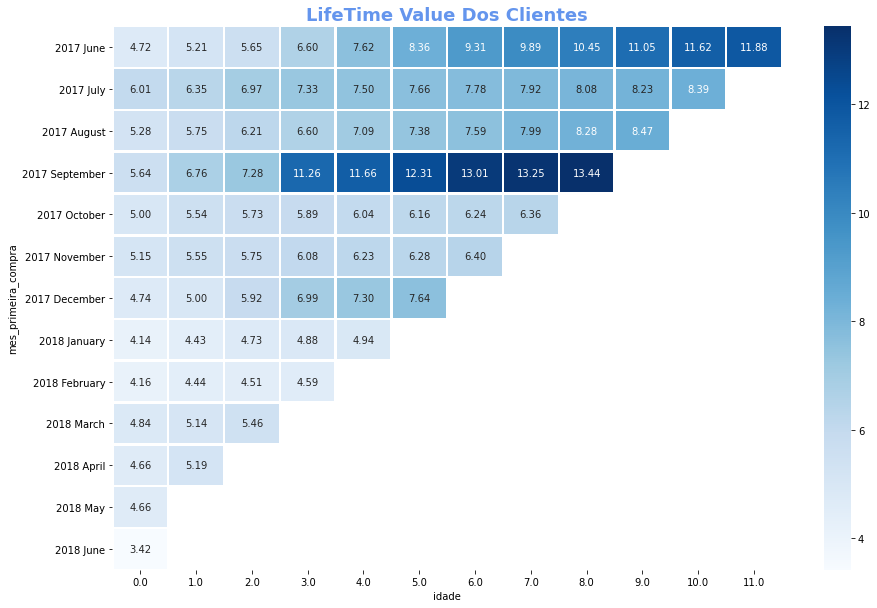

In [71]:
ltv_cohort_piv=ltv_cohort.pivot_table(
    index='mes_primeira_compra', 
    columns='idade', 
    values='ltv', 
    aggfunc='sum',   
)

df_temp = ltv_cohort_piv.copy()

df_temp.index = df_temp.index.year.astype(str) + " " + df_temp.index.strftime('%B')

display(df_temp.cumsum(axis=1).round(2).fillna(''))

plotheatmap(df_temp, "LifeTime Value Dos Clientes", True, 2)

<div class="alert alert-block alert-success">
<b> Comentário do revisor: </b> <a class="tocSkip"></a>

Correto
</div>

In [72]:
ltv_cohort_piv.mean(axis=1)

mes_primeira_compra
2017-06-01    0.989936
2017-07-01    0.762441
2017-08-01    0.847172
2017-09-01    1.492803
2017-10-01    0.795030
2017-11-01    0.913606
2017-12-01    1.273319
2018-01-01    0.988030
2018-02-01    1.146980
2018-03-01    1.818418
2018-04-01    2.594598
2018-05-01    4.660562
2018-06-01    3.420000
dtype: float64

<div class="alert alert-block alert-success">
<b> Comentário do revisor: </b> <a class="tocSkip"></a>

Correto
</div>

### Marketing

#### Quanto dinheiro foi gasto? No total/por origem/ao longo do tempo

##### Total

In [73]:
costs.head()

,source_id,dt,costs
0,1,2017-06-01,75.20
1,1,2017-06-02,62.25
2,1,2017-06-03,36.53
3,1,2017-06-04,55.00
4,1,2017-06-05,57.08


<div class="alert alert-block alert-success">
<b> Comentário do revisor: </b> <a class="tocSkip"></a>

Correto
</div>

In [74]:
costs.dtypes

source_id          category
dt           datetime64[ns]
costs               float64
dtype: object

<div class="alert alert-block alert-success">
<b> Comentário do revisor: </b> <a class="tocSkip"></a>

Correto
</div>

In [75]:
print(f'O custo total em marketing e de: {costs.costs.sum():,.2f} $')

O custo total em marketing e de: 329,131.62 $


<div class="alert alert-block alert-success">
<b> Comentário do revisor: </b> <a class="tocSkip"></a>

Correto
</div>

##### Por Origem

Para esta metrica iremos agrupar os custos pela `origem` e calcular a soma  

In [76]:
custo_por_fonte=costs.groupby(['source_id'])['costs'].sum().reset_index()
custo_por_fonte.head(10)

,source_id,costs
0,1,20833.27
1,10,5822.49
2,2,42806.04
3,3,141321.63
4,4,61073.60
5,5,51757.10
6,9,5517.49


<div class="alert alert-block alert-success">
<b> Comentário do revisor: </b> <a class="tocSkip"></a>

Correto
</div>

A funcao abaixo tem apenas o objectivo de obter as cores que serao usadas no grafico de barras de modos a destacar a barra de maior valor

In [77]:
def obter_cores(coluna : pd.Series = None, corNormal:str='gray', corDestaque:str='#1071b2' ):
    
    cores = [corNormal if (x < np.max(coluna)) else corDestaque for x in coluna] 
    return cores

<div class="alert alert-block alert-success">
<b> Comentário do revisor: </b> <a class="tocSkip"></a>

Correto
</div>

In [78]:
def plotpiechart():
    colors = sns.color_palette('Blues')

    #explsion
    explodelist = [0.05 if (x < np.max(custo_por_fonte.costs)) else 0.1 for x in custo_por_fonte.costs]
    explode = tuple(explodelist)

    fig1, ax1 = plt.subplots()

    ax1.pie(custo_por_fonte.costs, colors = colors, labels=custo_por_fonte.source_id, autopct='%1.1f%%', startangle=90, pctdistance=0.85, explode=explode)

    #draw circle
    centre_circle = plt.Circle((0,0),0.70,fc='white')
    fig = plt.gcf() # Get Current Figure

    # gca > get current axes
    #The Axes class in Matplotlib represents an individual plot (also known as a chart, graph, or subplot) within a figure
    fig.gca().add_artist(centre_circle)

    # Equal aspect ratio ensures that pie is drawn as a circle

    ax1.axis('equal')  
    plt.tight_layout()
    plt.show()

<div class="alert alert-block alert-success">
<b> Comentário do revisor: </b> <a class="tocSkip"></a>

Correto
</div>

A funcao abaixo tem o objectivo de apresentar um grafico de barras de modos a evitar a redundancia de codigo nos proximos graficos que serao apresentados. 

In [79]:
def barplot(df_tmp : pd.DataFrame, xcol : str, ycol : str, xlabel : str, ylabel : str, title : str, unidade : str):
    
    cores = obter_cores ( df_tmp[ycol], corDestaque= 'cornflowerblue' )

    df_tmp.plot.barh(x=xcol, y=ycol, rot=0, color=cores, legend=False, figsize=(16,6))
    
    plt.xticks(fontsize=16, rotation=0)
    plt.yticks(fontsize=16, rotation=0)
    plt.grid(axis = 'y')

    #plt.title(title, color='cornflowerblue', fontweight='bold')
    plt.ylabel('', color='cornflowerblue', fontweight='bold')
    plt.xlabel('', color='cornflowerblue', fontweight='bold')
    
    plt.text(df_tmp[ycol].min(),  df_tmp.index.max() + 1 , title, fontsize=24, color='cornflowerblue', fontweight='bold')

    plt.text( df_tmp[ycol].max() * 1.02, (df_tmp[ycol].idxmax()) - .15 , \
        f"{round ( df_tmp[ycol].max(),2):,.2f} {unidade}" , color = 'white', fontsize='20', \
        ha = 'left', 
        #Bbox = dict(facecolor = 'cornflowerblue', alpha = 1, edgecolor='#ffffff', boxstyle='round,pad=.3')
        bbox = dict(facecolor = 'cornflowerblue', alpha = 1, edgecolor='#ffffff', boxstyle='round,pad=.3')
          )

    sns.despine(left=True)

<div class="alert alert-block alert-success">
<b> Comentário do revisor: </b> <a class="tocSkip"></a>

Correto
</div>

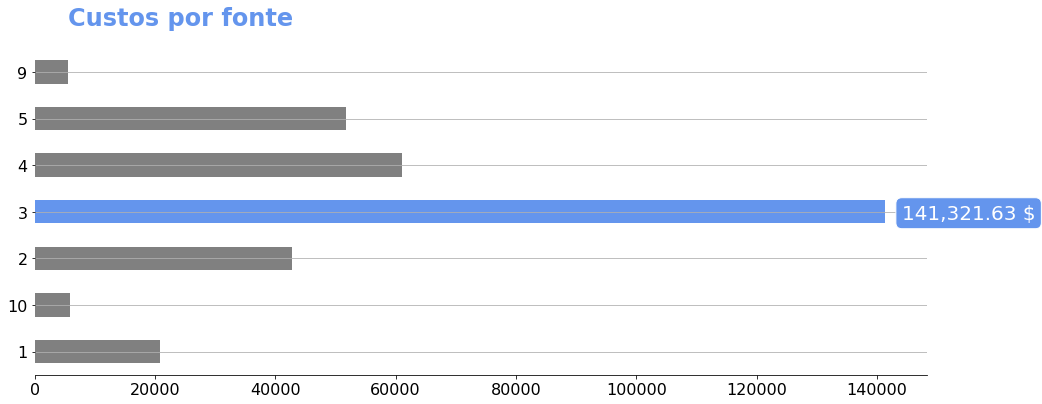

In [80]:
barplot(custo_por_fonte, 'source_id','costs','Custo', 'Custo','Custos por fonte', "$")

<div class="alert alert-block alert-success">
<b> Comentário do revisor: </b> <a class="tocSkip"></a>

Correto
</div>

In [81]:
def destaqueInfo(descricao:str, destaque:str ):
    display(HTML(f'<div>{descricao} <h1 style="display:inline; color:cornflowerblue">{destaque}</div></h3>'))


In [82]:
destaqueInfo("Conforme a apresentacao acima:<br> A fonte com maior investimento e a 3 no total de", f"{custo_por_fonte.costs.max():,.2f} $" )

<div class="alert alert-block alert-success">
<b> Comentário do revisor: </b> <a class="tocSkip"></a>

Correto
</div>

##### Ao longo do tempo

Para conseguirmos esta metrica iremos simplesmente agrupar por mes e origem de modos a facilitar as observacoes

In [83]:
costs['mes_custo'] = costs['dt'].dt.date.astype('datetime64[M]')
custo_por_mes = costs.groupby(['mes_custo','source_id'])['costs'].sum().reset_index()

custo_por_mes.head()

,mes_custo,source_id,costs
0,2017-06-01,1,1125.61
1,2017-06-01,10,314.22
2,2017-06-01,2,2427.38
3,2017-06-01,3,7731.65
4,2017-06-01,4,3514.80


<div class="alert alert-block alert-success">
<b> Comentário do revisor: </b> <a class="tocSkip"></a>

Correto
</div>

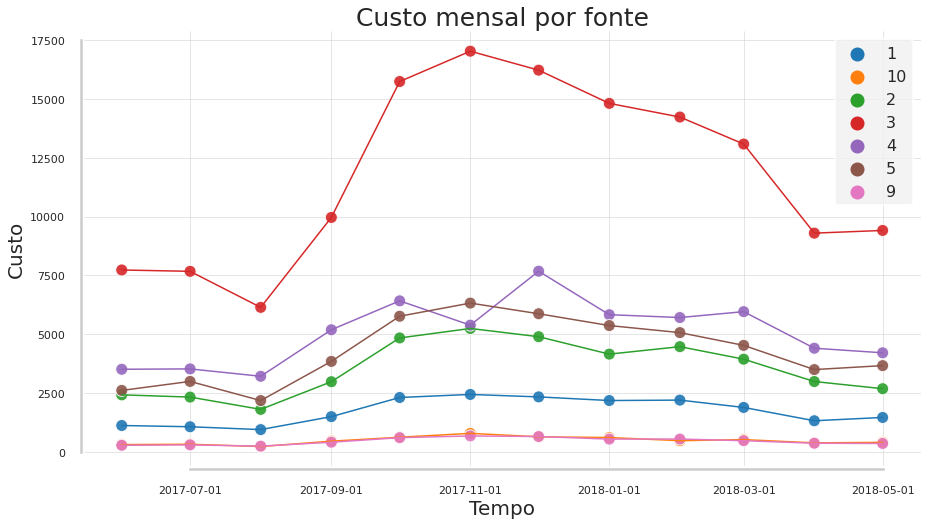

In [84]:
plt.figure(figsize=(15,8))

settings = {"grid.linewidth": 0.5, 'axes.labelsize': 20, 'legend.fontsize': 16, 'axes.titlesize': 25.0, "lines.linewidth": 1.5}

sns.set_style("whitegrid", {"axes.facecolor": "1"} )
sns.set_context("poster", font_scale = .5, rc=settings)

sns.lineplot(data=custo_por_mes, x="mes_custo", y='costs', hue='source_id', legend=False)
sns.scatterplot(data=custo_por_mes, x="mes_custo", y="costs", hue='source_id', alpha=.9)

legend = plt.legend()
seabornleg = legend.get_frame ()
seabornleg.set_facecolor ('#f1f1f1')
seabornleg.set_edgecolor ('white')

sns.despine(left=False, bottom=False, offset=3, trim=True)

plt.title('Custo mensal por fonte')
plt.ylabel('Custo')
plt.xlabel('Tempo')

plt.show()


<div class="alert alert-block alert-success">
<b> Comentário do revisor: </b> <a class="tocSkip"></a>

Correto
</div>

- A fonte `3` se mostra mais uma vez a mais activa em termos de investimento de marketing
- As fontes com menor investimento sao a `9 e 10`

<div class="alert alert-block alert-success">
<b> Comentário do revisor: </b> <a class="tocSkip"></a>

Correto
</div>

#### CAC Geral

CAC ( custo de aquisição de cliente)   
E o custo para atrair um consumidor—quanto cada novo cliente custa para a empresa.

Iremos entao:
- Agrupar a quantidade de clientes por mes
- Agrupar o custo de marketing por mes
- Unir as tabelas pelo mes
- Calcular o CAC = (Custo total mes / Total clientes mes) 

In [85]:
marketing_mes=costs.groupby(['mes_custo'])['costs'].sum().reset_index()
marketing_mes.columns=['mes','custo']
marketing_mes.head()

,mes,custo
0,2017-06-01,18015.00
1,2017-07-01,18240.59
2,2017-08-01,14790.54
3,2017-09-01,24368.91
4,2017-10-01,36322.88


<div class="alert alert-block alert-success">
<b> Comentário do revisor: </b> <a class="tocSkip"></a>

Correto
</div>

In [86]:
ordens_mes=orders.groupby(['mes_primeira_compra'])['Uid'].nunique().reset_index()
ordens_mes.columns=['mes','clientes']
ordens_mes.head()

,mes,clientes
0,2017-06-01,2023
1,2017-07-01,1923
2,2017-08-01,1370
3,2017-09-01,2581
4,2017-10-01,4340


<div class="alert alert-block alert-success">
<b> Comentário do revisor: </b> <a class="tocSkip"></a>

Correto
</div>

In [87]:
CAC_mes= marketing_mes.merge(ordens_mes, how='left', on=['mes'])

CAC_mes['CAC'] = CAC_mes['custo'] / CAC_mes['clientes']

CAC_mes.head()

,mes,custo,clientes,CAC
0,2017-06-01,18015.00,2023,8.905091
1,2017-07-01,18240.59,1923,9.485486
2,2017-08-01,14790.54,1370,10.796015
3,2017-09-01,24368.91,2581,9.441654
4,2017-10-01,36322.88,4340,8.369327


<div class="alert alert-block alert-success">
<b> Comentário do revisor: </b> <a class="tocSkip"></a>

Correto
</div>

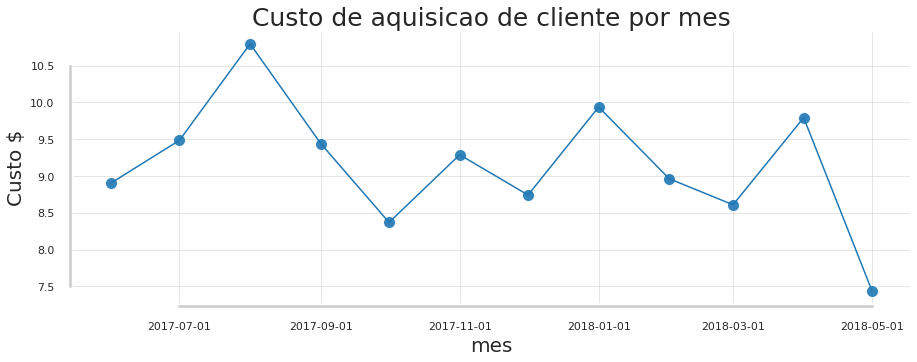

In [88]:
plt.figure(figsize=(15,5))

settings = {"grid.linewidth": 0.5, 'axes.labelsize': 20, 'legend.fontsize': 16, 'axes.titlesize': 25.0, "lines.linewidth": 1.5}

sns.set_style("whitegrid", {"axes.facecolor": "1"} )
sns.set_context("poster", font_scale = .5, rc=settings)

sns.lineplot(data=CAC_mes, x="mes", y='CAC', legend=False)
sns.scatterplot(data=CAC_mes, x="mes", y="CAC",  alpha=.9)
sns.despine(left=False, bottom=False, offset=3, trim=True)

plt.title('Custo de aquisicao de cliente por mes')
plt.ylabel('Custo $')
plt.xlabel('mes')

plt.show()

destaqueInfo("A media do custo de aquisicao de cliente e de ", f"{CAC_mes.CAC.mean():,.3}$" )

<div class="alert alert-block alert-success">
<b> Comentário do revisor: </b> <a class="tocSkip"></a>

Correto
</div>

##### Quanto custou a aquisição de clientes para cada origem?
A nossa tabela visits contem a origem de cada cliente  
Iremos entao:
- Unir as tabelas orders e visits de modos a termos apenas os utilizadores convertidos
- Agrupar a quantidade de clientes por origem
- Agrupar o marketing por origem
- Juntar as tabela 
- Calcular o CAC = (Custo total por origem / Total clientes atraidos pela fonte) 

In [89]:
convertidos = visits[['Uid','Source Id']].merge(orders[['Uid','Revenue']], on='Uid', how='inner')
convertidos.head()

,Uid,Source Id,Revenue
0,16174680259334210214,9,2.33
1,16174680259334210214,4,2.33
2,16007536194108375387,5,2.44
3,16007536194108375387,5,1.53
4,16007536194108375387,5,1.53


<div class="alert alert-block alert-success">
<b> Comentário do revisor: </b> <a class="tocSkip"></a>

Correto
</div>

In [90]:
clientes_por_fonte = convertidos.groupby('Source Id')['Uid'].nunique().reset_index()
clientes_por_fonte

,Source Id,Uid
0,1,7138
1,10,1773
2,2,7305
3,3,13846
4,4,14253
5,5,10156
6,6,0
7,7,1
8,9,2793


<div class="alert alert-block alert-success">
<b> Comentário do revisor: </b> <a class="tocSkip"></a>

Correto
</div>

Ja haviamos criado a tabela com os custos por fonte

In [91]:
custo_por_fonte

,source_id,costs
0,1,20833.27
1,10,5822.49
2,2,42806.04
3,3,141321.63
4,4,61073.60
5,5,51757.10
6,9,5517.49


<div class="alert alert-block alert-success">
<b> Comentário do revisor: </b> <a class="tocSkip"></a>

Correto
</div>

Resta apenas juntar as tabelas

In [92]:
custos_marketing_por_fonte = clientes_por_fonte.merge( custo_por_fonte, how='left', left_on='Source Id', right_on='source_id')
display(custos_marketing_por_fonte)

,Source Id,Uid,source_id,costs
0,1,7138,1,20833.27
1,10,1773,10,5822.49
2,2,7305,2,42806.04
3,3,13846,3,141321.63
4,4,14253,4,61073.60
5,5,10156,5,51757.10
6,6,0,NaN,NaN
7,7,1,NaN,NaN
8,9,2793,9,5517.49


<div class="alert alert-block alert-success">
<b> Comentário do revisor: </b> <a class="tocSkip"></a>

Correto
</div>

Source ID 6 e 7 nao tiveram investimento no marketing

In [93]:
custos_marketing_por_fonte.dropna(inplace=True)
custos_marketing_por_fonte['CAC'] = custos_marketing_por_fonte['costs'] / custos_marketing_por_fonte['Uid']

custos_marketing_por_fonte

,Source Id,Uid,source_id,costs,CAC
0,1,7138,1,20833.27,2.918642
1,10,1773,10,5822.49,3.283976
2,2,7305,2,42806.04,5.859828
3,3,13846,3,141321.63,10.206676
4,4,14253,4,61073.60,4.284965
5,5,10156,5,51757.10,5.096209
8,9,2793,9,5517.49,1.975471


<div class="alert alert-block alert-success">
<b> Comentário do revisor: </b> <a class="tocSkip"></a>

Correto
</div>

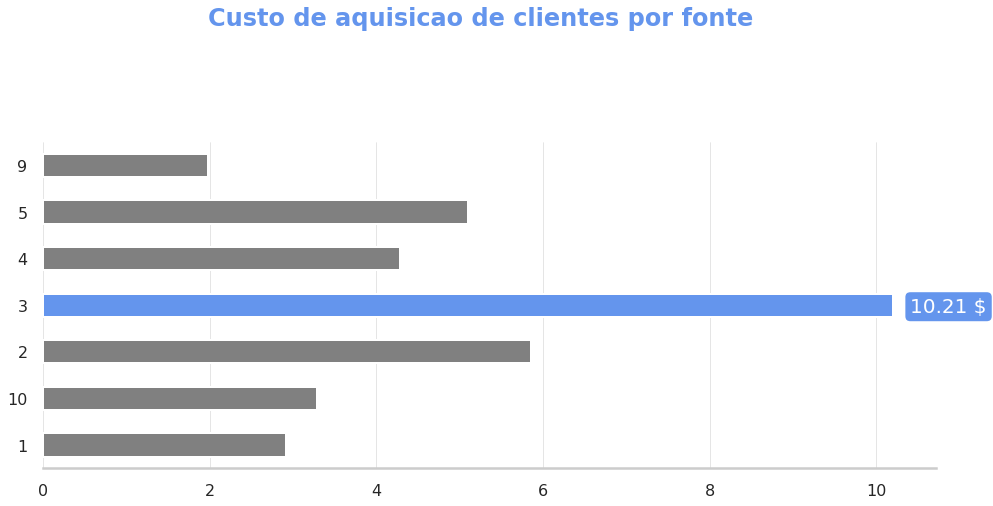

In [94]:
barplot(custos_marketing_por_fonte, 'source_id','CAC',None, None,'Custo de aquisicao de clientes por fonte',"$")
plt.show()
destaqueInfo("A media do custo de aquisicao de cliente por fontes e de ", f"{custos_marketing_por_fonte.CAC.mean():,.3}$" )

<div class="alert alert-block alert-success">
<b> Comentário do revisor: </b> <a class="tocSkip"></a>

Correto
</div>

#### Receita por fonte

Uma ves que temos os dados com a receita e a origem podemos ver quais as origens que mais renderam

,Source Id,Revenue
6,6,0.000000e+00
7,7,1.220000e+00
1,10,1.461923e+04
8,9,3.634225e+04
3,3,2.966880e+05
4,4,4.966902e+05
5,5,1.181477e+06
0,1,2.298200e+06
2,2,2.638189e+06


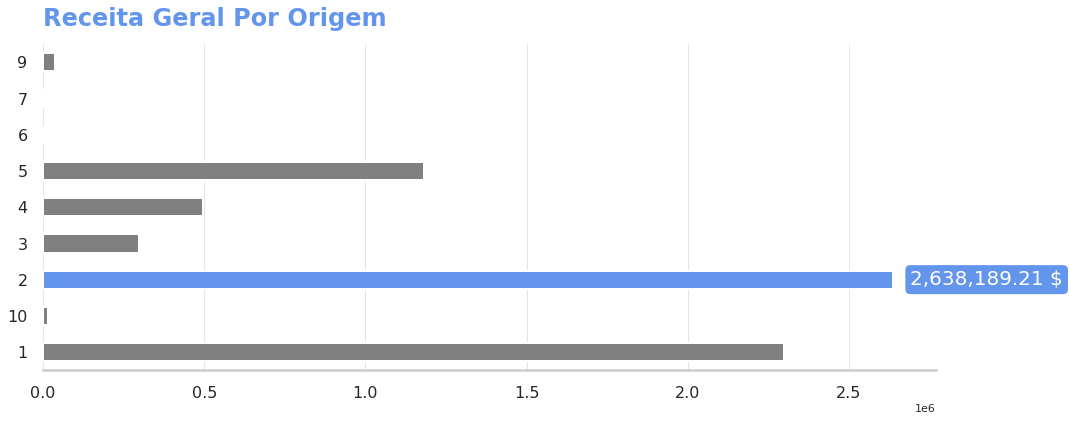

In [95]:
df_temp = convertidos.groupby('Source Id').Revenue.sum().reset_index()
display(df_temp.sort_values('Revenue'))
barplot(df_temp, 'Source Id','Revenue',None, None,'Receita Geral Por Origem',"$")

<div class="alert alert-block alert-success">
<b> Comentário do revisor: </b> <a class="tocSkip"></a>

Correto
</div>

#### Os investimentos valeram a pena? (ROI)

##### ROI
ROI = (Lucro - Despesas Marketing) / Despesas Marketing

In [96]:
lucro = orders.Revenue.sum()

despesas = costs.costs.sum()

roi = (lucro - despesas) / despesas

print( f"{(roi * 100):.2f}%" )

-23.42%


Numa observacao geral, o ROI esta negativo, para podermos talvez ajudar a entender podemos nos aprofundar e calcular o ROI por origem e por cada cohort 

<div class="alert alert-block alert-success">
<b> Comentário do revisor: </b> <a class="tocSkip"></a>

Correto
</div>

##### ROI por Cohort

Iremos aproveitar a tabela ja criada CAC por mes e a tabela LTV para cada mes  
Podemos entao unir as duas

In [97]:
CAC_mes.head()

,mes,custo,clientes,CAC
0,2017-06-01,18015.00,2023,8.905091
1,2017-07-01,18240.59,1923,9.485486
2,2017-08-01,14790.54,1370,10.796015
3,2017-09-01,24368.91,2581,9.441654
4,2017-10-01,36322.88,4340,8.369327


<div class="alert alert-block alert-success">
<b> Comentário do revisor: </b> <a class="tocSkip"></a>

Correto
</div>

In [98]:
ltv_cohort.head()

,mes_primeira_compra,mes_compra,revenue,cohort_size,idade,ltv
0,2017-06-01,2017-06-01,9557.49,2023,0.0,4.724414
1,2017-06-01,2017-07-01,981.82,2023,1.0,0.485329
2,2017-06-01,2017-08-01,885.34,2023,2.0,0.437637
3,2017-06-01,2017-09-01,1931.30,2023,3.0,0.954671
4,2017-06-01,2017-10-01,2068.58,2023,4.0,1.022531


<div class="alert alert-block alert-success">
<b> Comentário do revisor: </b> <a class="tocSkip"></a>

Correto
</div>

In [99]:
ROI = ltv_cohort.merge( CAC_mes[['mes','CAC']], left_on='mes_primeira_compra', right_on='mes', how='left')

ROI.head()

,mes_primeira_compra,mes_compra,revenue,cohort_size,idade,ltv,mes,CAC
0,2017-06-01,2017-06-01,9557.49,2023,0.0,4.724414,2017-06-01,8.905091
1,2017-06-01,2017-07-01,981.82,2023,1.0,0.485329,2017-06-01,8.905091
2,2017-06-01,2017-08-01,885.34,2023,2.0,0.437637,2017-06-01,8.905091
3,2017-06-01,2017-09-01,1931.30,2023,3.0,0.954671,2017-06-01,8.905091
4,2017-06-01,2017-10-01,2068.58,2023,4.0,1.022531,2017-06-01,8.905091


<div class="alert alert-block alert-success">
<b> Comentário do revisor: </b> <a class="tocSkip"></a>

Correto
</div>

Caculamos o ROI = LTV / CAC

idade,0.0,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,10.0,11.0
mes_primeira_compra,,,,,,,,,,,,
2017 June,53.0,5.0,5.0,11.0,11.0,8.0,11.0,7.0,6.0,7.0,6.0,3.0
2017 July,63.0,4.0,7.0,4.0,2.0,2.0,1.0,1.0,2.0,2.0,2.0,
2017 August,49.0,4.0,4.0,4.0,5.0,3.0,2.0,4.0,3.0,2.0,,
2017 September,60.0,12.0,6.0,42.0,4.0,7.0,7.0,3.0,2.0,,,
2017 October,60.0,6.0,2.0,2.0,2.0,1.0,1.0,1.0,,,,
2017 November,55.0,4.0,2.0,3.0,2.0,1.0,1.0,,,,,
2017 December,54.0,3.0,11.0,12.0,4.0,4.0,,,,,,
2018 January,42.0,3.0,3.0,1.0,1.0,,,,,,,
2018 February,46.0,3.0,1.0,1.0,,,,,,,,


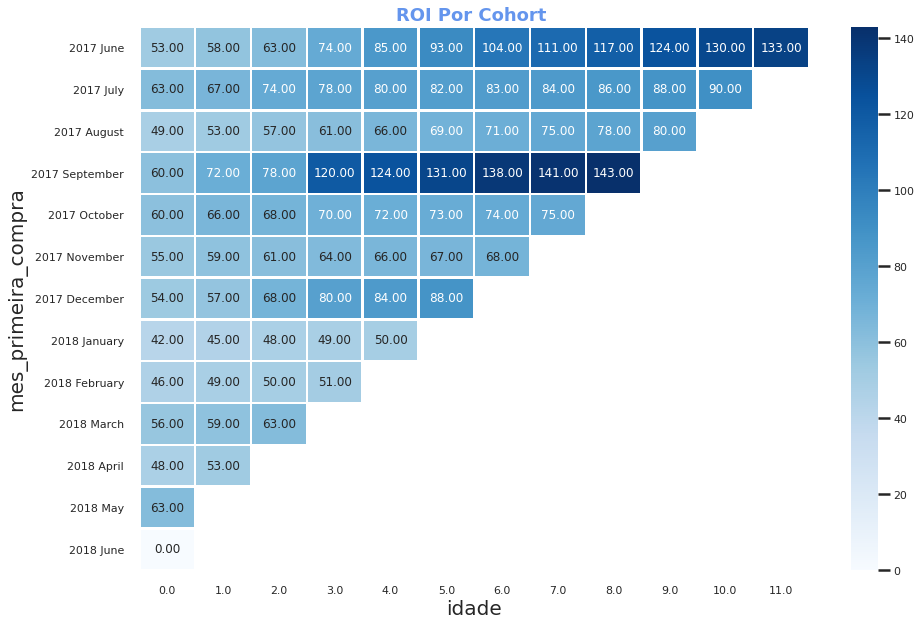

In [100]:
ROI['ROI'] = ROI['ltv'] / ROI['CAC']

roi_piv = ROI.pivot_table( index='mes_primeira_compra', columns='idade', values='ROI', aggfunc='sum').round(2) 

roi_piv = roi_piv * 100

roi_piv.index = roi_piv.index.year.astype(str) + " " + roi_piv.index.strftime('%B')
display(roi_piv.fillna(''))

plotheatmap(roi_piv, 'ROI Por Cohort ', cumsum = True, casasDecimais=2,percentagem= False)

<div class="alert alert-block alert-success">
<b> Comentário do revisor: </b> <a class="tocSkip"></a>

Correto
</div>

In [101]:
resumo = roi_piv.sum(axis='columns').reset_index(name='ROI')
resumo

,mes_primeira_compra,ROI
0,2017 June,133.0
1,2017 July,90.0
2,2017 August,80.0
3,2017 September,143.0
4,2017 October,75.0
5,2017 November,68.0
6,2017 December,88.0
7,2018 January,50.0
8,2018 February,51.0
9,2018 March,63.0


<div class="alert alert-block alert-success">
<b> Comentário do revisor: </b> <a class="tocSkip"></a>

Correto
</div>

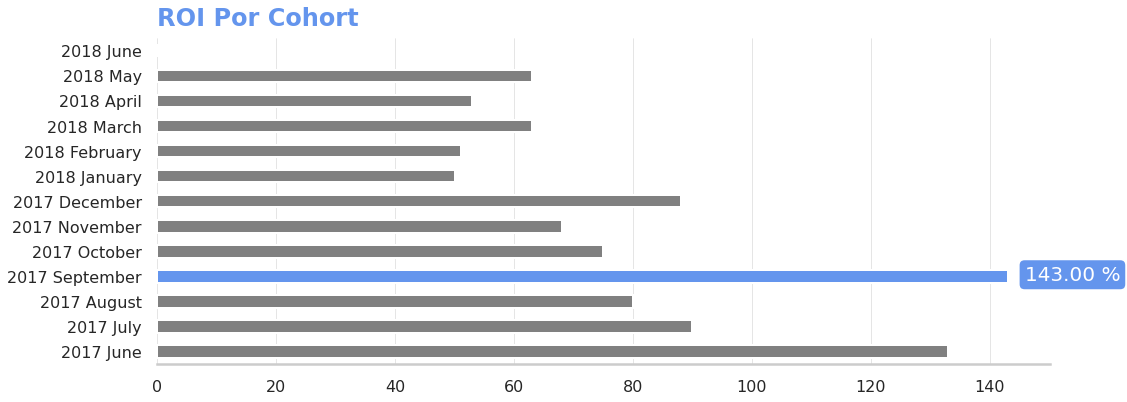

In [102]:
barplot(resumo, 'mes_primeira_compra','ROI',None, None,'ROI Por Cohort', unidade='%')
plt.show()
destaqueInfo("O cohorte com maior retorno de investimo teve um retorno de: ", f"{resumo['ROI'].max():}%" )

<div class="alert alert-block alert-success">
<b> Comentário do revisor: </b> <a class="tocSkip"></a>

Correto
</div>

Segue abaixo os cohorts com melhor desempenho:

In [103]:
top5Cohorts = resumo.loc[ resumo.index.isin( resumo['ROI'].nlargest(5).index.tolist() ) ].sort_values('ROI', ascending=False)
top5Cohorts

,mes_primeira_compra,ROI
3,2017 September,143.0
0,2017 June,133.0
1,2017 July,90.0
6,2017 December,88.0
2,2017 August,80.0


<div class="alert alert-block alert-success">
<b> Comentário do revisor: </b> <a class="tocSkip"></a>

Correto
</div>

In [104]:
sucesso = resumo.loc[ resumo.ROI >= 100 ]

In [105]:
print(f"Apenas {len(sucesso)} cohorts cobriram as despesas de marketing ")
display(sucesso)

Apenas 2 cohorts cobriram as despesas de marketing 


,mes_primeira_compra,ROI
0,2017 June,133.0
3,2017 September,143.0


O cohort de Junho atingido os 100% do investimento ao fim do 6o mes e o cohorte de Setembro ao fim do 3o mes.

<div class="alert alert-block alert-success">
<b> Comentário do revisor: </b> <a class="tocSkip"></a>

Correto
</div>

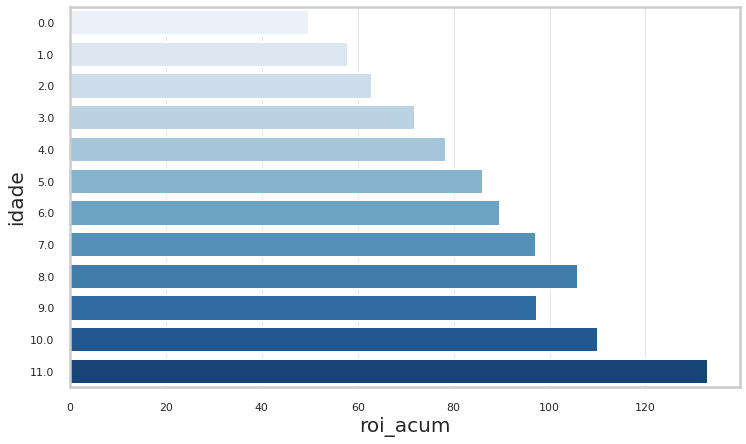

In [106]:
media_roi_acumulado = roi_piv.cumsum(axis='columns').mean(axis='rows').reset_index()
media_roi_acumulado.columns = ['idade', 'roi_acum']

plt.figure(figsize=(12,7))
sns.barplot(data=media_roi_acumulado, orient='horizontal' ,y='idade', x='roi_acum', palette='Blues')
plt.title('')
plt.show()

De forma geral, o custo de marketing sao cobertos a partir do 8o mes

<div class="alert alert-block alert-success">
<b> Comentário do revisor: </b> <a class="tocSkip"></a>

Correto
</div>

## Conclusoes

Feita a analise da empresa Y.Afisha com os dados de 1 ano, deixamos as nossas oberservacoes/recomendacoes para a equipa de marketing.

- Apesar do ROI geral <font color='blue'>ainda</font> estar negativo, aproximadamente **<font color='red'>-20%</font>**, a empresa **<font color='green'>tem potencial</font>** de boa rentabilidade e crescimento nos proximos anos.


- Observamos nitidamente que a fontes com maior investimento em marketing tem sido a **<font color='purple'> 3 </font>**, mas, os rendimentos da empresa estao na seguinte ordem:  
  - 2 : 2,638,189.21 $   
  
  - 1 : 2,298,200.17 $   
  
  - 5 : 1,181,477.14 $   
  
  - 4 : 496,690.17 $   
  
  - **<font color='purple'>3 : 296,687.96 $</font>**   
  
  - ... 
  
  
- E necessario <font color='blue'>validar</font> os motivos e talvez potencializar ainda mais as fontes que mais receita geram.


- Entender os <font color='blue'>eventos</font> que impulsionaram o **<font color='green'>crescimento das vendas a partir do 7 mes</font>** para a cohorte de Junho de 2017 e para o 4o mes da cohorte de Setembro de 2017, ambos tem a cobertura dos custos de marketing a coincidir no mes de **<font color='green'>Dezembro</font>**.


<div class="alert alert-block alert-success">
<b> Comentário do revisor: </b> <a class="tocSkip"></a>

Correto
</div>


> Obrigado,
<font color='blue'>Gerson Barroso.</font>


<div class="alert alert-block alert-success">
<b>Comentário Geral do Revisor</b> <a class="tocSkip"></a>

Obrigado por enviar seu projeto. Seu projeto está excelente. Você apresentou código simples, limpo, eficiente. Os gráficos estão excelentes. Conclusões ótimas. Você apresentou explicação da função, o que facilitou bastante a revisão. Desejo sucesso na jornada.
</div>